# Problem statement

Avocado is a bright green color fruit, which has a rich source of  vitamins C, E, K, and B6 and it is consumed heavily in the United States 


the dataset that will be used for building the model has been collected from Hass Avocado Board website in May of 2018. The dataset contains information about retail scan data for National retail volume (units) and price.
some of the important columns in the dataset are:


Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Goal:
the goal of the model is to predict the average price of the different types of avocado, which is continuous in nature 

# loading all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# loading the dataset

In [47]:
df=pd.read_csv('avocado.csv')

In [48]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# exploratory data analysis

In [13]:
df.shape

(18249, 14)

in the dataset, there are 18249 rows and 14 columns 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [15]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

there is absence of any null value in the dataset and the columns are mainly of int 64 and float 64 data type. only columns date and region are of object type

the column names containing continous values are:
AveragePrice    
Total Volume   
4046            
4225            
4770            
Total Bags      
Small Bags      
Large Bags      
XLarge Bags     

In [16]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [17]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [18]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [277]:
# checking relation of the type of avocado with the average price
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

observation: it can be seen that in the year 2017, highest number of avocados have been sold and in every year since 2015, the sale of both types of avocadi is nearly the same 

# descriptive analysis

In [278]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


observation: huge number of outliers are present in some of the columns because of large difference between the 75th quartile and max
    
there are no null values in the dataset

skewness is present in some of the columns and it can be idneitified from the difference  between the mean value and 50th quartile value of the columns 
    

# visualisation of the data

<AxesSubplot:xlabel='type', ylabel='count'>

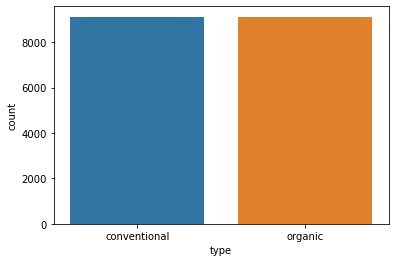

In [20]:
sns.countplot(df['type'])

comparison of type of avocado with price 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

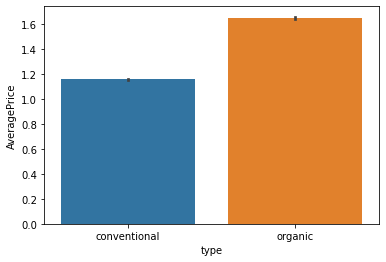

In [280]:
sns.barplot(x=df['type'],y=df['AveragePrice'])

it can be seen that the average price of type of conventional avocado is lesser than that of organic types. the price of conventional type ranges between 0 to less than 1.2, while organic type have average price range between 0 to 1.6

<AxesSubplot:xlabel='year', ylabel='count'>

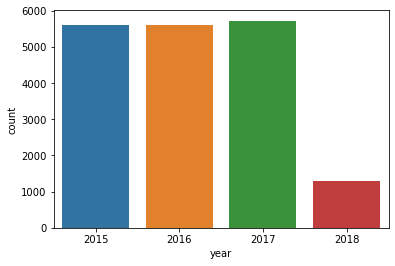

In [22]:
sns.countplot(df['year'])

observation: in the dataset, maximum observation have been collected for the year 2015, 2016, 2017 and the minimum observation for 2018.
    2018 has nearly 1000 observations. 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

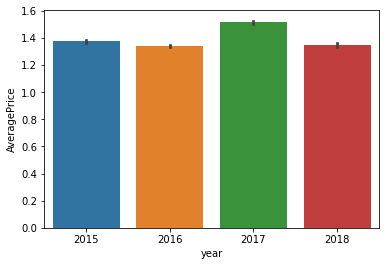

In [281]:
sns.barplot(x=df['year'],y=df['AveragePrice'])

observation: the average price of the avocados were comparatively higher in the year 2017 and low in 2018 and 2016. 

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

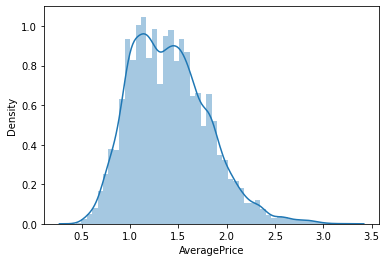

In [39]:
 sns.distplot(df['AveragePrice'])

observation: it is the plot of the first target variable and it can be seen that it is a continuous data. the maximum density of data is between 0.75 to 1.75. it can be concluded that people are prefering to buy the avocados within this price range and the data is normally distributed

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

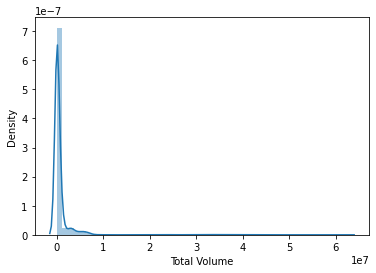

In [51]:
 sns.distplot(df['Total Volume'])

observation: the maximum total volume of avocado is between 0.25*10^7 to 1*10^7.

<AxesSubplot:xlabel='4046', ylabel='Density'>

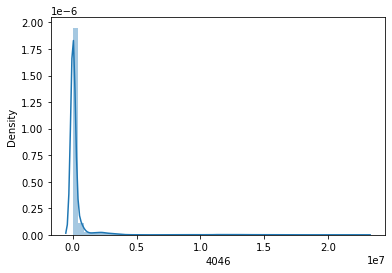

In [64]:
 sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

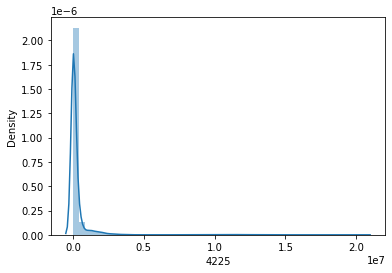

In [43]:
 sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

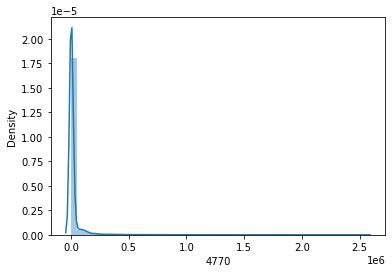

In [44]:
 sns.distplot(df['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

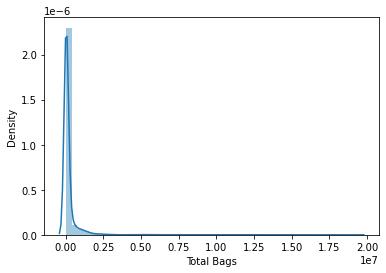

In [45]:
 sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

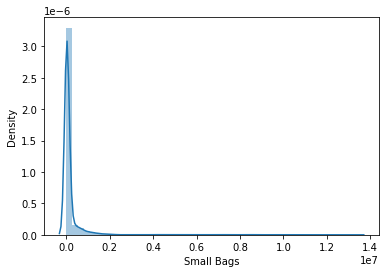

In [46]:
 sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

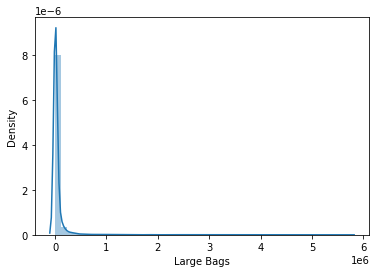

In [49]:
 sns.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

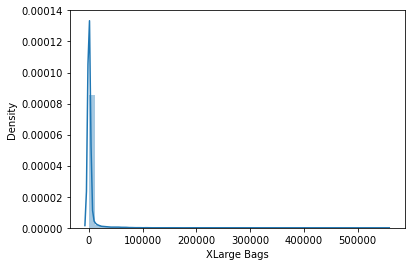

In [50]:
 sns.distplot(df['XLarge Bags'])

from the above distribution plots, it can be observed that the data are skewed and needs to be adjusted

we can drop the Unnamed: 0 because it has no correlation with the target variable. 

In [49]:
df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=["type","year","region"]
for i in l:
    df[i]=le.fit_transform(df[i])

In [51]:
df["year"].value_counts()

2    5722
1    5616
0    5615
3    1296
Name: year, dtype: int64

In [52]:
df["type"].value_counts()

0    9126
1    9123
Name: type, dtype: int64

# visualisation using the heatmap

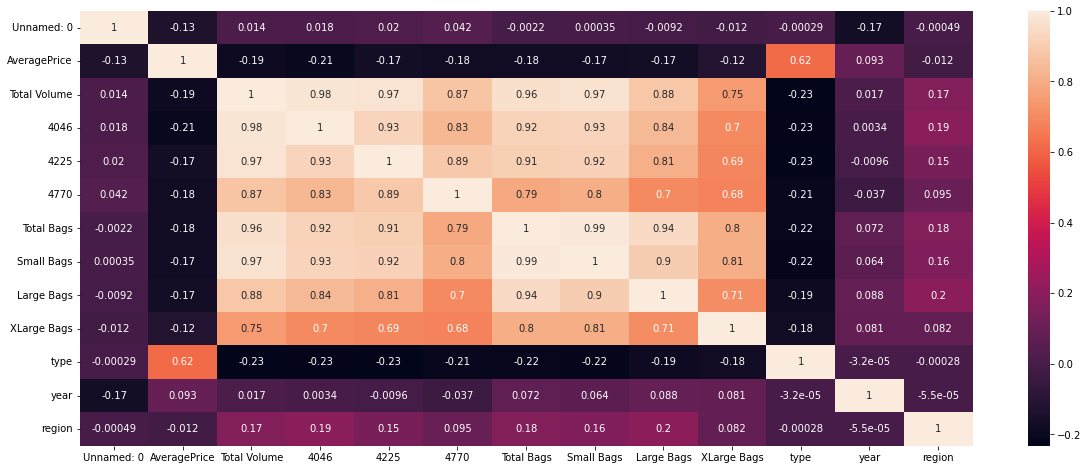

In [82]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [83]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
Unnamed: 0     -0.133008
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

# further visualisation

from the heatmap, we can see that Total Bags,  Small Bags,   Large Bags and  XLarge Bags have strong correlation   

<AxesSubplot:xlabel='Small Bags', ylabel='Total Volume'>

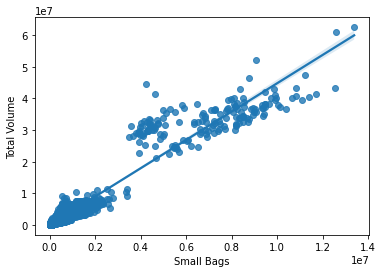

In [295]:
sns.regplot(x=df["Small Bags"], y=df["Total Volume"])

<AxesSubplot:xlabel='Large Bags', ylabel='Total Volume'>

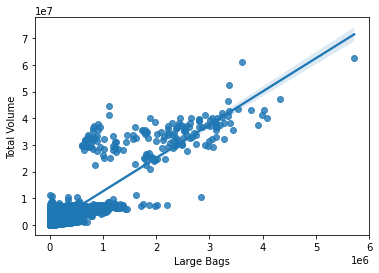

In [296]:
sns.regplot(x=df["Large Bags"], y=df["Total Volume"])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Total Volume'>

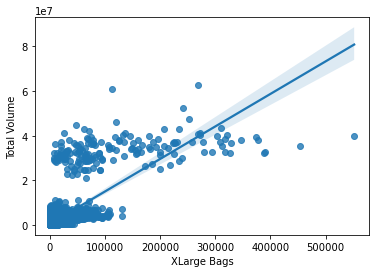

In [297]:
sns.regplot(x=df["XLarge Bags"], y=df["Total Volume"])

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

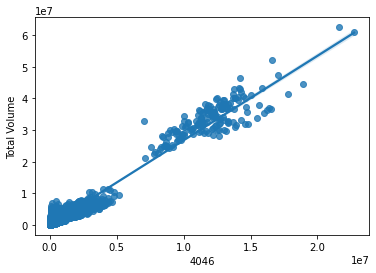

In [298]:
sns.regplot(x=df["4046"], y=df["Total Volume"])

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

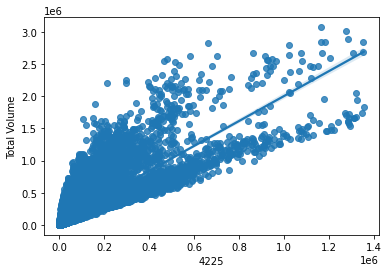

In [128]:
sns.regplot(x=df["4225"], y=df["Total Volume"])

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

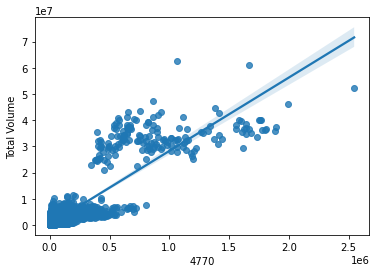

In [299]:
sns.regplot(x=df["4770"], y=df["Total Volume"])

observation: from the plots, it can be seen that the columns have strong correlation with the Total Volume column  we will be dropping both these column to remove multicollinearity 

In [53]:
dnew=df.drop(["Total Volume"],axis=1)

In [54]:
dnew.columns

Index(['AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [55]:
# checking correlation with the column TotalBags

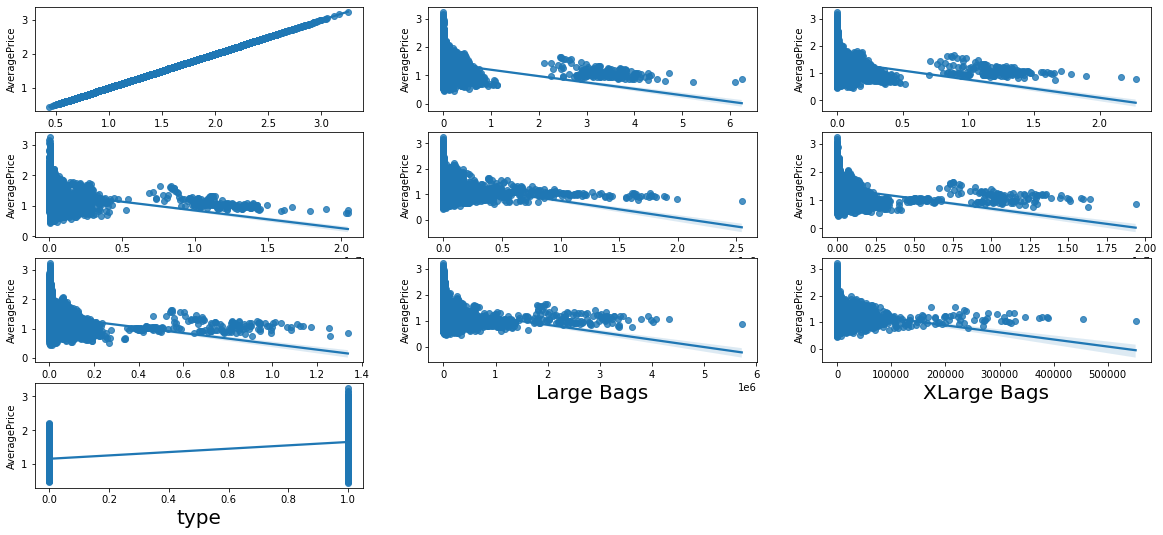

In [305]:
plt.figure(figsize=(20,25))
plotnumber =1
for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(11,3,plotnumber)
        sns.regplot(x=df[column],y=df["AveragePrice"])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

we can also see that the columns have correlation with the TotalBags column, we can drop it

In [56]:
dnew=df.drop(["Total Bags","Total Volume"],axis=1)

# variance inflation factor

In [57]:
# importing libraries to calculate the variance inflation factor, which may result in low accuracy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [59]:
x=df.drop(["AveragePrice"],axis=1)
y=df["AveragePrice"]

In [60]:
calc_vif(x)

,Variables,VIF factor
0,Total Volume,5.218092e+09
1,4046,6.954550e+08
2,4225,6.339859e+08
3,4770,4.978784e+06
4,Total Bags,2.502000e+14
5,Small Bags,1.429714e+14
6,Large Bags,1.521486e+13
7,XLarge Bags,7.855778e+10
8,type,1.787467e+00
9,year,1.982500e+00


it can be observed that the VIF is critically high

In [61]:
x=dnew.drop(["AveragePrice"],axis=1)
y=dnew["AveragePrice"]

In [62]:
calc_vif(x)

,Variables,VIF factor
0,4046,10.628848
1,4225,14.077990
2,4770,5.595269
3,Small Bags,20.647290
4,Large Bags,5.833962
5,XLarge Bags,3.517597
6,type,1.785626
7,year,1.979974
8,region,2.371146


## removal of outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Large Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
XLarge Bags     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
type                  AxesSubplot(0.125,0.125;0.0945122x0.343182)
year               AxesSubplot(0.238415,0.125;0.0945122x0.343182)
region             AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

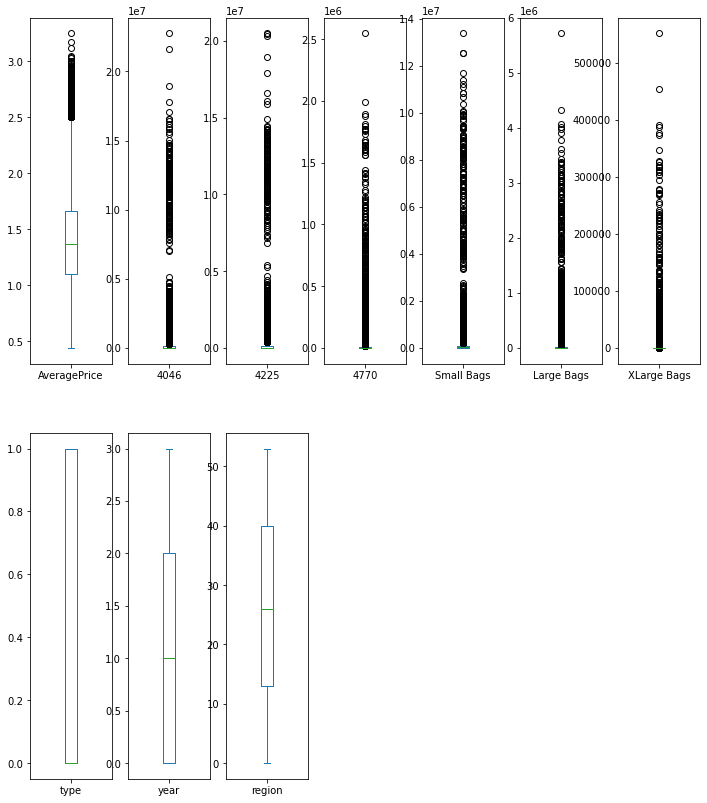

In [63]:
dnew.plot(kind='box',subplots=True,layout=(2,7),figsize=(12,14))

In [313]:
dnew.dtypes

AveragePrice    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(dnew))

In [65]:
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([1, 1, 6, ..., 0, 0, 0], dtype=int64))

In [66]:
dfnew=dnew[(z<3).all(axis=1)]

In [67]:
dfnew.shape

(17651, 10)

In [39]:
df.shape

(18249, 12)

percentage of data loss= (18249-17651)/18249*100=3.2%

# checking the correlation with the heatmap once more

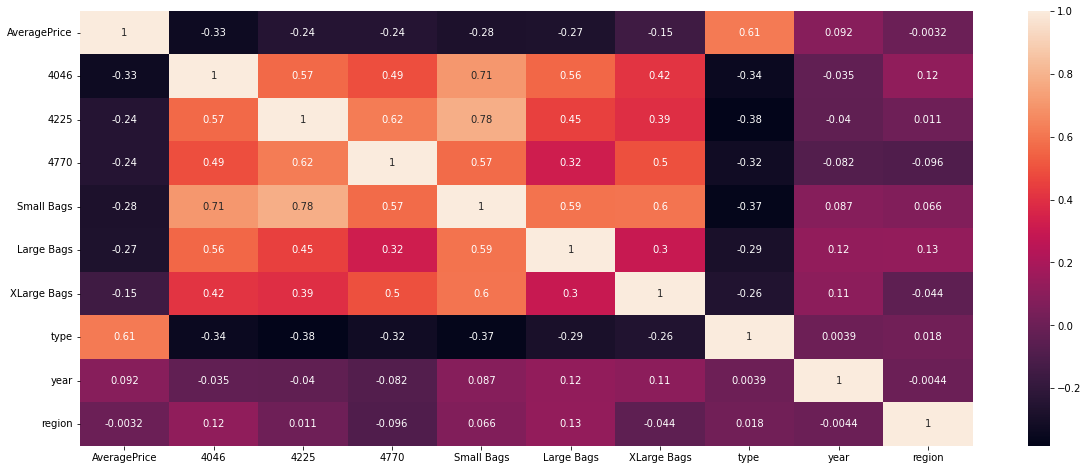

In [319]:
plt.figure(figsize=(20,8))
sns.heatmap(dfnew.corr(),annot=True)
plt.show()

from the heatmap it can be seen that the multicollinearity in the dataframe has been eliminated to improve the overall accuracy of the model

# skewness removal

In [68]:
dfnew.skew().sort_values()

type           -0.037741
region          0.012798
year            0.229976
AveragePrice    0.377432
Small Bags      4.222706
4225            4.455745
4046            4.909848
Large Bags      5.053434
4770            5.117170
XLarge Bags     6.135607
dtype: float64

observation: it can be seen that high skewness is there for columns like Small Bags, 4225, 4046, 4770, XLarge bags and Large Bags

In [69]:
list=['type','region','year','Small Bags', '4225', '4046', '4770', 'XLarge Bags','Large Bags']

In [70]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [71]:
dfnew.skew().sort_values()

Small Bags     -0.788988
Large Bags     -0.610874
4225           -0.604619
4046           -0.420273
type           -0.037741
region          0.012798
4770            0.068532
year            0.229976
AveragePrice    0.377432
XLarge Bags     1.216238
dtype: float64

it can be seen that skewness in the dataset has been removed

# scaling of data

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [73]:
x=dfnew.drop(["AveragePrice"],axis=1)
y=dfnew["AveragePrice"]

In [74]:
dfx=sc.fit_transform(x)

In [75]:
dfx.mean()

-1.5744216127984896e-17

# application of machine learning models

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [77]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)

        print(f"at random state {i}, training accuracy is {r2_score(y_train,pred_train)}")
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
        if((r2_score(y_test,pred_test))>maxacc):
        maxacc=r2_score(y_test,pred_test)
        rs=i
    print("Max accuracy at random state",rs, "=",maxacc)

## testing with linear regression model

In [331]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, training accuracy is 0.4721954004941026
at random state 0, testing accuracy is 0.4650274291535692
at random state 0, mean squared error is 0.08017180954377391
at random state 0, mean absolute error is 0.2212709231098439


at random state 1, training accuracy is 0.47164840687209764
at random state 1, testing accuracy is 0.4673221237277062
at random state 1, mean squared error is 0.08026074204162453
at random state 1, mean absolute error is 0.22219291219605763


at random state 2, training accuracy is 0.4737643161523939
at random state 2, testing accuracy is 0.45871624614081774
at random state 2, mean squared error is 0.08042499950236547
at random state 2, mean absolute error is 0.22444873918799885


at random state 3, training accuracy is 0.46810492320766617
at random state 3, testing accuracy is 0.48144686385239
at random state 3, mean squared error is 0.07662690772158996
at random state 3, mean absolute error is 0.2190227513807934


at random state 4, training accur

at random state 38, mean absolute error is 0.21835706740068966


at random state 39, training accuracy is 0.47648621926743184
at random state 39, testing accuracy is 0.44687023830151495
at random state 39, mean squared error is 0.08007688519346379
at random state 39, mean absolute error is 0.22203537281628694


at random state 40, training accuracy is 0.4702546001099873
at random state 40, testing accuracy is 0.47291227597561714
at random state 40, mean squared error is 0.07796408392587204
at random state 40, mean absolute error is 0.21929630641620765


at random state 41, training accuracy is 0.4699231517081828
at random state 41, testing accuracy is 0.47402227242184924
at random state 41, mean squared error is 0.07760740213923206
at random state 41, mean absolute error is 0.2218379123852688


at random state 42, training accuracy is 0.47064963501736423
at random state 42, testing accuracy is 0.4707260501308673
at random state 42, mean squared error is 0.0781820252971664
at random sta

at random state 74, testing accuracy is 0.47840195894615156
at random state 74, mean squared error is 0.07603335762400566
at random state 74, mean absolute error is 0.21781751654376103


at random state 75, training accuracy is 0.4703304989820062
at random state 75, testing accuracy is 0.47249766321952635
at random state 75, mean squared error is 0.07890686727592873
at random state 75, mean absolute error is 0.22013417151312664


at random state 76, training accuracy is 0.46960458612592926
at random state 76, testing accuracy is 0.47547546891858417
at random state 76, mean squared error is 0.0752937417666969
at random state 76, mean absolute error is 0.2165256936330698


at random state 77, training accuracy is 0.4723899192717471
at random state 77, testing accuracy is 0.46417297148479086
at random state 77, mean squared error is 0.07893621226197782
at random state 77, mean absolute error is 0.22004402403805468


at random state 78, training accuracy is 0.47093089776006447
at random st

CV score

In [332]:
score=cross_val_score(lm,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[-0.46368434  0.07534713 -0.15508942  0.44871333  0.12614908  0.11790035
  0.08815421]
0.033927190745051
0.2606597691806302


## KNeighbors Regressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, training accuracy is 0.8711242533973079
at random state 0, testing accuracy is 0.7932982885824444
at random state 0, mean squared error is 0.03071467824773414
at random state 0, mean absolute error is 0.12327945619335348


at random state 1, training accuracy is 0.8724947162101151
at random state 1, testing accuracy is 0.7946524077812535
at random state 1, mean squared error is 0.030914116314199394
at random state 1, mean absolute error is 0.12400528700906344


at random state 2, training accuracy is 0.8750221986144251
at random state 2, testing accuracy is 0.7951591536289885
at random state 2, mean squared error is 0.030718841389728097
at random state 2, mean absolute error is 0.12440936555891238


at random state 3, training accuracy is 0.8715352098312765
at random state 3, testing accuracy is 0.8042910274952633
at random state 3, mean squared error is 0.02945454833836858
at random state 3, mean absolute error is 0.12248716012084593


at random state 4, training ac

at random state 34, training accuracy is 0.8705344782809565
at random state 34, testing accuracy is 0.7970619675767416
at random state 34, mean squared error is 0.030491691842900303
at random state 34, mean absolute error is 0.12183383685800606


at random state 35, training accuracy is 0.8707839307220322
at random state 35, testing accuracy is 0.7996576161198664
at random state 35, mean squared error is 0.029566263595166162
at random state 35, mean absolute error is 0.12158723564954683


at random state 36, training accuracy is 0.8728489440386258
at random state 36, testing accuracy is 0.7980445834700525
at random state 36, mean squared error is 0.02977484969788519
at random state 36, mean absolute error is 0.12192182779456195


at random state 37, training accuracy is 0.8706761043750996
at random state 37, testing accuracy is 0.802852521779321
at random state 37, mean squared error is 0.029629265861027185
at random state 37, mean absolute error is 0.12039274924471298


at random stat

at random state 68, training accuracy is 0.8703043592266422
at random state 68, testing accuracy is 0.791839095084055
at random state 68, mean squared error is 0.030585536253776434
at random state 68, mean absolute error is 0.12234138972809668


at random state 69, training accuracy is 0.8710395689506123
at random state 69, testing accuracy is 0.7984249827431558
at random state 69, mean squared error is 0.03050553776435045
at random state 69, mean absolute error is 0.12320921450151054


at random state 70, training accuracy is 0.8751481652771773
at random state 70, testing accuracy is 0.7875072661316136
at random state 70, mean squared error is 0.032639009818731114
at random state 70, mean absolute error is 0.12697847432024167


at random state 71, training accuracy is 0.8731124206460419
at random state 71, testing accuracy is 0.7945500855171008
at random state 71, mean squared error is 0.030592097432024165
at random state 71, mean absolute error is 0.12433043806646525


at random stat

CV score

In [80]:
score=cross_val_score(knr,dfx,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[ 0.07305524 -0.31773364  0.0844167   0.10033252 -0.20758233  0.14972695
  0.19883881  0.29118848  0.22587806 -0.20026004]
0.039786075858580704
0.19713355305821367


# DecisionTreeRegressor

In [339]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
model_selection(dtc)

at random state 0, training accuracy is 1.0
at random state 0, testing accuracy is 0.6774532202415088
at random state 0, mean squared error is 0.04833735485698102
at random state 0, mean absolute error is 0.1464797507788162


at random state 1, training accuracy is 1.0
at random state 1, testing accuracy is 0.68320534822074
at random state 1, mean squared error is 0.0477327386009629
at random state 1, mean absolute error is 0.14468139337298216


at random state 2, training accuracy is 1.0
at random state 2, testing accuracy is 0.6682543438048768
at random state 2, mean squared error is 0.04929141886151232
at random state 2, mean absolute error is 0.14656471254602096


at random state 3, training accuracy is 1.0
at random state 3, testing accuracy is 0.6844887972954702
at random state 3, mean squared error is 0.046623279524214106
at random state 3, mean absolute error is 0.145154347210422


at random state 4, training accuracy is 1.0
at random state 4, testing accuracy is 0.698624242478

at random state 36, training accuracy is 1.0
at random state 36, testing accuracy is 0.672927472704951
at random state 36, mean squared error is 0.04693446615689606
at random state 36, mean absolute error is 0.14231662418578306


at random state 37, training accuracy is 1.0
at random state 37, testing accuracy is 0.7037104395496406
at random state 37, mean squared error is 0.04409991503823279
at random state 37, mean absolute error is 0.13932030586236194


at random state 38, training accuracy is 1.0
at random state 38, testing accuracy is 0.6861344185516519
at random state 38, mean squared error is 0.04634927782497875
at random state 38, mean absolute error is 0.1410960067969414


at random state 39, training accuracy is 1.0
at random state 39, testing accuracy is 0.6891929781949162
at random state 39, mean squared error is 0.04499569527046162
at random state 39, mean absolute error is 0.1411554800339847


at random state 40, training accuracy is 1.0
at random state 40, testing accura

at random state 72, training accuracy is 1.0
at random state 72, testing accuracy is 0.700376433141922
at random state 72, mean squared error is 0.04588006230529595
at random state 72, mean absolute error is 0.14085811384876806


at random state 73, training accuracy is 1.0
at random state 73, testing accuracy is 0.6906273324002921
at random state 73, mean squared error is 0.046040583404134805
at random state 73, mean absolute error is 0.14160011328235625


at random state 74, training accuracy is 1.0
at random state 74, testing accuracy is 0.679192877159186
at random state 74, mean squared error is 0.046764061172472386
at random state 74, mean absolute error is 0.14340130274709714


at random state 75, training accuracy is 1.0
at random state 75, testing accuracy is 0.6904097590402716
at random state 75, mean squared error is 0.04631030869442085
at random state 75, mean absolute error is 0.14267629566694986


at random state 76, training accuracy is 1.0
at random state 76, testing acc

In [ ]:
score=cross_val_score(dtc,dfx,y,cv=8)
print(score)
print(score.mean())
print(score.std())

# GradientBoostingRegressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model_selection(gb)

at random state 0, training accuracy is 0.6899889461179713
at random state 0, testing accuracy is 0.6662309013846404
at random state 0, mean squared error is 0.04959615671637024
at random state 0, mean absolute error is 0.17004839169196004


at random state 1, training accuracy is 0.685905726763429
at random state 1, testing accuracy is 0.6624408016861383
at random state 1, mean squared error is 0.05081795314398608
at random state 1, mean absolute error is 0.17243815052423814


at random state 2, training accuracy is 0.6933509034470868
at random state 2, testing accuracy is 0.6676168185350171
at random state 2, mean squared error is 0.04984565536085859
at random state 2, mean absolute error is 0.16991647357616407


at random state 3, training accuracy is 0.6860845281827517
at random state 3, testing accuracy is 0.6737041713341962
at random state 3, mean squared error is 0.049108102377944586
at random state 3, mean absolute error is 0.16841133799487365


at random state 4, training accu

at random state 34, training accuracy is 0.6859665543966134
at random state 34, testing accuracy is 0.6649095163103902
at random state 34, mean squared error is 0.05034776205399432
at random state 34, mean absolute error is 0.16987539981125246


at random state 35, training accuracy is 0.6852134226839426
at random state 35, testing accuracy is 0.6705370056315824
at random state 35, mean squared error is 0.04862171222928789
at random state 35, mean absolute error is 0.1688893108497296


at random state 36, training accuracy is 0.6940654721442732
at random state 36, testing accuracy is 0.6650217865417465
at random state 36, mean squared error is 0.04938677124466523
at random state 36, mean absolute error is 0.16873669077657782


at random state 37, training accuracy is 0.6867013887145501
at random state 37, testing accuracy is 0.6738922501422111
at random state 37, mean squared error is 0.04901068635056112
at random state 37, mean absolute error is 0.16766588288543138


at random state 3

at random state 68, training accuracy is 0.692370914648881
at random state 68, testing accuracy is 0.6655601165517253
at random state 68, mean squared error is 0.04913998228460063
at random state 68, mean absolute error is 0.16809215224026894


at random state 69, training accuracy is 0.6875953239869408
at random state 69, testing accuracy is 0.668284711289578
at random state 69, mean squared error is 0.050200433587831446
at random state 69, mean absolute error is 0.17110341925379957


at random state 70, training accuracy is 0.6903212949360296
at random state 70, testing accuracy is 0.6624763037336019
at random state 70, mean squared error is 0.05184383972073484
at random state 70, mean absolute error is 0.17334747472475906


at random state 71, training accuracy is 0.6912558627785215
at random state 71, testing accuracy is 0.6611977612493634
at random state 71, mean squared error is 0.05044865131306787
at random state 71, mean absolute error is 0.17176193894413463


at random state 7

In [82]:
score=cross_val_score(gb,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.21251605 0.3942506  0.41396247 0.24574424 0.64598232 0.29593615
 0.4400672  0.30594594 0.17623748]
0.3478491617571897
0.1360365488820587


# RandomForestRegressor

In [258]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_selection(rf)

at random state 0, training accuracy is 0.973789916911575
at random state 0, testing accuracy is 0.8227015063439409
at random state 0, mean squared error is 0.024096888521346758
at random state 0, mean absolute error is 0.11201558486636586


at random state 1, training accuracy is 0.9746853816446602
at random state 1, testing accuracy is 0.8286791558418365
at random state 1, mean squared error is 0.023042384585213474
at random state 1, mean absolute error is 0.10951166261714683


at random state 2, training accuracy is 0.9744212457988305
at random state 2, testing accuracy is 0.8197435402603348
at random state 2, mean squared error is 0.024752525043387708
at random state 2, mean absolute error is 0.11185328011107253


at random state 3, training accuracy is 0.9742985025495625
at random state 3, testing accuracy is 0.8243541674292205
at random state 3, mean squared error is 0.02424778710517182
at random state 3, mean absolute error is 0.11244828184658105


at random state 4, training ac

at random state 34, training accuracy is 0.9743425497735778
at random state 34, testing accuracy is 0.8118352454875946
at random state 34, mean squared error is 0.02546485263450191
at random state 34, mean absolute error is 0.11421242624088856


at random state 35, training accuracy is 0.97471722036956
at random state 35, testing accuracy is 0.8159688245882989
at random state 35, mean squared error is 0.025117819448108297
at random state 35, mean absolute error is 0.11363391183616797


at random state 36, training accuracy is 0.9743996641785475
at random state 36, testing accuracy is 0.8201349480527644
at random state 36, mean squared error is 0.02439644949323153
at random state 36, mean absolute error is 0.11234213814647695


at random state 37, training accuracy is 0.97420934994658
at random state 37, testing accuracy is 0.8088511597266935
at random state 37, mean squared error is 0.025301509333564738
at random state 37, mean absolute error is 0.11378642832349879


at random state 38

at random state 68, training accuracy is 0.9744878502889164
at random state 68, testing accuracy is 0.8182417526650738
at random state 68, mean squared error is 0.025800015706351962
at random state 68, mean absolute error is 0.11365362721277335


at random state 69, training accuracy is 0.97421933347641
at random state 69, testing accuracy is 0.8155113933868136
at random state 69, mean squared error is 0.0253245965498091
at random state 69, mean absolute error is 0.11265623047552933


at random state 70, training accuracy is 0.9745696754969019
at random state 70, testing accuracy is 0.8251525650987632
at random state 70, mean squared error is 0.02430435199583478
at random state 70, mean absolute error is 0.11212113849357862


at random state 71, training accuracy is 0.9753039037806454
at random state 71, testing accuracy is 0.8055874362477364
at random state 71, mean squared error is 0.026549530881638316
at random state 71, mean absolute error is 0.11552735161402289


at random state 7

In [260]:
score=cross_val_score(rf,dfx,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[-0.04241865  0.22460506  0.02435112  0.5932798   0.31536063  0.54867476
  0.3767961   0.13540964]
0.2720073085867303
0.21613776316670033


we will select the Gradient Boost Regressor algorithm for building the model

# hyper parameter tuning using Grid Search CV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
dict={'max_features':['auto','sqrt','log2'],'loss':['squared_error', 'absolute_error'],'learning_rate':[0.01,0.1],'n_estimators':[200,300],'criterion':['friedman_mse', 'squared_error']}

In [85]:
gd=GridSearchCV(estimator=gb,param_grid=dict,cv=9)

In [ ]:
gd.fit(dfx,y)

In [272]:
gd.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'n_estimators': 200}

In [273]:
gd.best_score_

0.36484154175663014

# prediction of the region 

## visualisation

descriptive statistics

In [87]:
dfnew.shape

(17651, 10)

In [98]:
dfnew.sample(10)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
2494,1.07,9.997641,10.491210,8.326698,8.839291,7.436588,0.000000,0,0,47
4521,1.14,9.628807,12.736927,7.927537,11.729727,9.241386,0.000000,0,1,32
16511,1.84,7.959629,7.917172,0.000000,8.536315,3.643359,0.000000,1,2,33
5096,1.02,11.705366,11.043127,7.825157,11.191998,10.811018,0.000000,0,1,44
9923,1.56,9.398777,11.129704,0.000000,8.654807,9.236310,0.000000,1,0,15
18003,1.43,7.885401,7.969206,0.000000,9.506273,3.635479,0.000000,1,3,33
5217,1.11,14.467545,13.322496,9.240307,13.512978,12.580586,9.179670,0,1,46
13904,1.56,5.242329,7.875716,6.106132,7.508156,6.464760,0.000000,1,1,37
845,1.15,10.322569,11.593462,5.689007,10.853835,7.412993,0.000000,0,0,16
4490,1.45,9.600546,12.278661,7.847567,11.962629,9.757243,7.622297,0,1,32


In [99]:
xx=dfnew.drop(["region"],axis=1)
yy=dfnew["region"]

## standard scaler

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [101]:
xx=sc.fit_transform(dfxx)

In [102]:
xx.mean()

0.0

# splitting of data

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [118]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(xx,yy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

## KNeighborsClassifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0,  accuracy score is 0.8155211480362538
at random state 0, confusion matrix is [[86  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  2]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  1 ...  0  0 61]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.75      0.92      0.83        93
           1       0.65      0.69      0.67       102
           2       0.86      0.91      0.88       100
           3       0.90      0.74      0.81       104
           4       0.87      0.91      0.89       104
           5       0.78      0.73      0.76        97
           6       0.95      0.93      0.94        84
           7       0.76      0.85      0.80       106
           8       0.94      0.89      0.91       119
           9       0.78      0.81      0.79        93
          10       0.76      0.80      0.78       113
          11       0.80      0.88      0.84       104
 

at random state 3,  accuracy score is 0.8168429003021148
at random state 3, confusion matrix is [[ 88   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  67   0]
 [  0   0   2 ...   0   0  70]]
at random state 3, classification report is               precision    recall  f1-score   support

           0       0.74      0.87      0.80       101
           1       0.68      0.75      0.71       107
           2       0.89      0.94      0.91       108
           3       0.84      0.87      0.85       107
           4       0.88      0.84      0.86       103
           5       0.74      0.80      0.77       108
           6       0.88      0.94      0.91        79
           7       0.75      0.90      0.82        82
           8       0.97      0.95      0.96       108
           9       0.72      0.82      0.77        98
          10       0.67      0.77      0.72        99
          11       

at random state 6,  accuracy score is 0.8187311178247734
at random state 6, confusion matrix is [[ 91   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   0]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  73   0]
 [  0   0   0 ...   0   0  75]]
at random state 6, classification report is               precision    recall  f1-score   support

           0       0.79      0.89      0.84       102
           1       0.74      0.66      0.70       116
           2       0.92      0.96      0.94       114
           3       0.87      0.86      0.86        77
           4       0.88      0.86      0.87        90
           5       0.71      0.73      0.72        92
           6       0.96      0.86      0.91        80
           7       0.78      0.87      0.82       119
           8       0.94      0.97      0.96       101
           9       0.79      0.77      0.78       106
          10       0.66      0.74      0.70       104
          11       

at random state 9,  accuracy score is 0.8175981873111783
at random state 9, confusion matrix is [[79  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  3]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  1  0 ...  0  0 81]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.76      0.91      0.83        87
           1       0.66      0.65      0.65       108
           2       0.90      0.91      0.90       104
           3       0.80      0.77      0.78        94
           4       0.86      0.94      0.90       106
           5       0.77      0.68      0.72       106
           6       0.90      0.97      0.93        93
           7       0.75      0.81      0.78        95
           8       0.91      0.95      0.93        93
           9       0.64      0.92      0.76        92
          10       0.70      0.68      0.69       107
          11       0.85      0.91      0.88       105
 

at random state 12,  accuracy score is 0.8132552870090635
at random state 12, confusion matrix is [[89  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  2]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 76  0]
 [ 0  0  2 ...  0  0 76]]
at random state 12, classification report is               precision    recall  f1-score   support

           0       0.79      0.88      0.84       101
           1       0.63      0.71      0.67        94
           2       0.83      0.99      0.91        92
           3       0.79      0.70      0.75        98
           4       0.86      0.84      0.85        98
           5       0.78      0.72      0.75       107
           6       0.92      0.86      0.89        88
           7       0.71      0.86      0.78       111
           8       0.97      0.90      0.93        99
           9       0.64      0.73      0.68       104
          10       0.67      0.71      0.69       104
          11       0.84      0.86      0.85       10

at random state 15,  accuracy score is 0.8119335347432024
at random state 15, confusion matrix is [[ 72   0   0 ...   0   0   0]
 [  0  85   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   0   0 ...   0   0  78]]
at random state 15, classification report is               precision    recall  f1-score   support

           0       0.70      0.83      0.76        87
           1       0.69      0.79      0.73       108
           2       0.84      0.98      0.91       104
           3       0.82      0.77      0.79        98
           4       0.78      0.87      0.82        92
           5       0.82      0.66      0.73       105
           6       0.96      0.97      0.96        94
           7       0.76      0.82      0.79       103
           8       0.96      0.90      0.93       113
           9       0.76      0.78      0.77       109
          10       0.60      0.75      0.66        96
          11    

at random state 18,  accuracy score is 0.8194864048338368
at random state 18, confusion matrix is [[ 90   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   0]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  54   0   0]
 [  0   0   0 ...   0  60   0]
 [  0   1   2 ...   0   0  69]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.65      0.77      0.70       104
           2       0.83      0.94      0.89       107
           3       0.82      0.78      0.80        88
           4       0.86      0.88      0.87        90
           5       0.82      0.81      0.82        97
           6       0.92      0.92      0.92        99
           7       0.78      0.89      0.83       104
           8       0.94      0.92      0.93        86
           9       0.68      0.73      0.70       103
          10       0.73      0.73      0.73        98
          11    

at random state 21,  accuracy score is 0.8168429003021148
at random state 21, confusion matrix is [[83  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  1]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  2 ...  0  0 66]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.66      0.89      0.76        93
           1       0.66      0.74      0.69        91
           2       0.85      0.96      0.90        93
           3       0.84      0.78      0.81        89
           4       0.84      0.91      0.87        99
           5       0.75      0.76      0.76       108
           6       0.94      0.99      0.96        79
           7       0.74      0.82      0.78       110
           8       0.95      0.93      0.94       115
           9       0.67      0.82      0.74       101
          10       0.65      0.73      0.69        92
          11       0.83      0.91      0.87       10

at random state 24,  accuracy score is 0.8136329305135952
at random state 24, confusion matrix is [[90  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  3]
 [ 0  0 97 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  0  1 ...  0  0 77]]
at random state 24, classification report is               precision    recall  f1-score   support

           0       0.77      0.82      0.79       110
           1       0.56      0.74      0.64        90
           2       0.84      0.95      0.89       102
           3       0.85      0.79      0.82       103
           4       0.90      0.86      0.88       112
           5       0.75      0.72      0.73       111
           6       0.95      0.92      0.93       100
           7       0.76      0.83      0.79       107
           8       0.97      0.88      0.92        98
           9       0.78      0.78      0.78       116
          10       0.57      0.60      0.58        99
          11       0.83      0.94      0.88        8

at random state 27,  accuracy score is 0.8164652567975831
at random state 27, confusion matrix is [[101   0   0 ...   0   0   0]
 [  0  71   0 ...   0   0   2]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  57   0   0]
 [  0   0   0 ...   1  85   0]
 [  0   0   2 ...   0   0  75]]
at random state 27, classification report is               precision    recall  f1-score   support

           0       0.81      0.88      0.84       115
           1       0.67      0.70      0.68       102
           2       0.82      0.91      0.86       112
           3       0.87      0.82      0.84        99
           4       0.85      0.86      0.85       112
           5       0.79      0.73      0.76        92
           6       0.92      0.95      0.94        86
           7       0.72      0.86      0.79        87
           8       0.90      0.93      0.91       108
           9       0.66      0.73      0.69        95
          10       0.68      0.75      0.71       103
          11    

at random state 30,  accuracy score is 0.8132552870090635
at random state 30, confusion matrix is [[92  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  1]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  0  1 ...  0  0 76]]
at random state 30, classification report is               precision    recall  f1-score   support

           0       0.77      0.90      0.83       102
           1       0.62      0.71      0.66       103
           2       0.84      0.89      0.87       101
           3       0.85      0.82      0.84        96
           4       0.91      0.89      0.90       119
           5       0.73      0.75      0.74       109
           6       0.95      0.96      0.96        85
           7       0.72      0.88      0.79        90
           8       0.93      0.94      0.94       109
           9       0.74      0.71      0.73       108
          10       0.62      0.70      0.66       110
          11       0.78      0.95      0.86       10

at random state 33,  accuracy score is 0.8213746223564955
at random state 33, confusion matrix is [[ 95   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   1]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  58   0   0]
 [  0   0   0 ...   0  73   0]
 [  0   0   1 ...   0   0  76]]
at random state 33, classification report is               precision    recall  f1-score   support

           0       0.74      0.92      0.82       103
           1       0.73      0.75      0.74       107
           2       0.88      0.96      0.92       115
           3       0.83      0.81      0.82        99
           4       0.88      0.88      0.88       104
           5       0.77      0.78      0.78       106
           6       0.91      0.98      0.94        90
           7       0.83      0.85      0.84       117
           8       0.96      0.95      0.95        92
           9       0.71      0.81      0.76        97
          10       0.61      0.72      0.66        94
          11    

at random state 36,  accuracy score is 0.8119335347432024
at random state 36, confusion matrix is [[ 93   0   0 ...   0   0   0]
 [  0  64   0 ...   0   0   1]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  66   0]
 [  0   1   0 ...   0   0  79]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.77      0.86      0.81       108
           1       0.63      0.69      0.66        93
           2       0.83      0.95      0.89       110
           3       0.84      0.81      0.83        96
           4       0.85      0.93      0.89        98
           5       0.79      0.65      0.72       112
           6       0.99      0.89      0.93        88
           7       0.76      0.79      0.77       106
           8       0.94      0.89      0.91        99
           9       0.76      0.74      0.75       102
          10       0.67      0.66      0.67       116
          11    

at random state 39,  accuracy score is 0.8030589123867069
at random state 39, confusion matrix is [[81  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  1]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  0  2 ...  0  0 64]]
at random state 39, classification report is               precision    recall  f1-score   support

           0       0.77      0.87      0.82        93
           1       0.66      0.76      0.70        98
           2       0.87      0.91      0.89       105
           3       0.80      0.75      0.77       100
           4       0.86      0.90      0.88        96
           5       0.71      0.76      0.74        99
           6       0.93      0.94      0.94        85
           7       0.73      0.84      0.78       108
           8       0.91      0.94      0.93       101
           9       0.71      0.76      0.74       105
          10       0.56      0.65      0.60        89
          11       0.78      0.92      0.85        8

at random state 42,  accuracy score is 0.8149546827794562
at random state 42, confusion matrix is [[93  0  0 ...  0  0  0]
 [ 0 75  0 ...  0  0  1]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  0  0 ...  0  0 68]]
at random state 42, classification report is               precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.59      0.76      0.66        99
           2       0.87      0.95      0.91       100
           3       0.82      0.75      0.79       100
           4       0.89      0.87      0.88       103
           5       0.75      0.75      0.75       105
           6       0.94      0.93      0.94        89
           7       0.74      0.81      0.77       113
           8       0.90      0.96      0.93        94
           9       0.78      0.73      0.76       113
          10       0.61      0.73      0.67        92
          11       0.84      0.95      0.89       11

at random state 45,  accuracy score is 0.8100453172205438
at random state 45, confusion matrix is [[92  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  2]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  1 ...  0  0 70]]
at random state 45, classification report is               precision    recall  f1-score   support

           0       0.79      0.86      0.82       107
           1       0.64      0.77      0.70        99
           2       0.83      0.93      0.88        97
           3       0.87      0.75      0.81       106
           4       0.82      0.93      0.87        84
           5       0.72      0.72      0.72       103
           6       0.98      0.89      0.93        95
           7       0.69      0.79      0.73        84
           8       0.88      0.92      0.90        93
           9       0.69      0.83      0.75       102
          10       0.59      0.76      0.66        85
          11       0.82      0.93      0.87       10

at random state 48,  accuracy score is 0.8128776435045317
at random state 48, confusion matrix is [[98  0  0 ...  0  0  0]
 [ 0 79  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  0  1 ...  0  0 71]]
at random state 48, classification report is               precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.69      0.75      0.71       106
           2       0.91      0.88      0.90       104
           3       0.93      0.77      0.84        99
           4       0.83      0.94      0.88        78
           5       0.80      0.74      0.76       106
           6       0.87      0.95      0.91        88
           7       0.71      0.90      0.79        96
           8       0.93      0.95      0.94        82
           9       0.70      0.82      0.76        96
          10       0.70      0.72      0.71       118
          11       0.76      0.88      0.81        8

at random state 51,  accuracy score is 0.8064577039274925
at random state 51, confusion matrix is [[97  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  1]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  3 ...  0  0 80]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.77      0.91      0.83       107
           1       0.76      0.71      0.74       112
           2       0.83      0.94      0.88        97
           3       0.82      0.82      0.82        95
           4       0.84      0.90      0.87       114
           5       0.77      0.72      0.75       116
           6       0.91      0.97      0.94        76
           7       0.69      0.83      0.75        94
           8       0.95      0.94      0.95       102
           9       0.74      0.80      0.77       100
          10       0.67      0.70      0.68       114
          11       0.82      0.93      0.87        9

at random state 54,  accuracy score is 0.8047583081570997
at random state 54, confusion matrix is [[91  0  0 ...  0  0  0]
 [ 0 78  0 ...  0  0  3]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  0  2 ...  0  0 63]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.80      0.93      0.86        98
           1       0.68      0.74      0.71       105
           2       0.87      0.93      0.90        96
           3       0.79      0.84      0.81        92
           4       0.88      0.89      0.89       102
           5       0.74      0.73      0.74       120
           6       0.91      0.96      0.93        81
           7       0.72      0.80      0.76        92
           8       0.92      0.95      0.93        92
           9       0.68      0.84      0.75       110
          10       0.68      0.78      0.72        91
          11       0.72      0.91      0.81        9

at random state 57,  accuracy score is 0.802870090634441
at random state 57, confusion matrix is [[86  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  1]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  1 ...  0  0 88]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.69      0.86      0.76       100
           1       0.66      0.71      0.69       108
           2       0.81      0.94      0.87        86
           3       0.88      0.75      0.81       122
           4       0.81      0.91      0.86        97
           5       0.72      0.72      0.72       109
           6       0.90      0.96      0.92        90
           7       0.72      0.83      0.77        84
           8       0.94      0.95      0.94        92
           9       0.74      0.70      0.72       103
          10       0.61      0.70      0.65        91
          11       0.77      0.87      0.82        95

at random state 60,  accuracy score is 0.8121223564954683
at random state 60, confusion matrix is [[90  0  0 ...  0  0  0]
 [ 0 75  0 ...  0  0  1]
 [ 0  0 94 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  0  3 ...  0  0 79]]
at random state 60, classification report is               precision    recall  f1-score   support

           0       0.74      0.89      0.81       101
           1       0.60      0.78      0.68        96
           2       0.82      0.94      0.87       100
           3       0.87      0.80      0.83       104
           4       0.86      0.87      0.87       101
           5       0.77      0.77      0.77       106
           6       0.94      0.94      0.94        86
           7       0.74      0.87      0.80       100
           8       0.92      0.92      0.92       102
           9       0.70      0.83      0.76       104
          10       0.72      0.71      0.71       114
          11       0.85      0.92      0.88        9

at random state 63,  accuracy score is 0.80702416918429
at random state 63, confusion matrix is [[ 79   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   1]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ...  42   0   0]
 [  0   0   0 ...   0  66   0]
 [  0   0   3 ...   0   0  67]]
at random state 63, classification report is               precision    recall  f1-score   support

           0       0.77      0.84      0.80        94
           1       0.64      0.75      0.69       105
           2       0.86      0.95      0.90       111
           3       0.82      0.78      0.80       101
           4       0.92      0.92      0.92        95
           5       0.67      0.72      0.70        97
           6       0.91      0.99      0.95        83
           7       0.83      0.79      0.81       126
           8       0.92      0.92      0.92       102
           9       0.73      0.77      0.75       109
          10       0.64      0.73      0.69       101
          11      

at random state 66,  accuracy score is 0.8149546827794562
at random state 66, confusion matrix is [[85  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  2]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  1 ...  0  0 66]]
at random state 66, classification report is               precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.60      0.69      0.65       101
           2       0.84      0.92      0.88        97
           3       0.86      0.82      0.84        88
           4       0.82      0.93      0.87        89
           5       0.77      0.73      0.75        84
           6       0.94      0.94      0.94        86
           7       0.78      0.88      0.83        91
           8       0.91      0.93      0.92       102
           9       0.62      0.79      0.70       101
          10       0.76      0.71      0.74       118
          11       0.87      0.90      0.88       12

at random state 69,  accuracy score is 0.81797583081571
at random state 69, confusion matrix is [[107   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   2]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ...  53   0   0]
 [  0   0   0 ...   1  75   0]
 [  0   1   1 ...   0   0  80]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.78      0.92      0.85       116
           1       0.69      0.67      0.68       119
           2       0.88      0.95      0.91        97
           3       0.82      0.82      0.82        97
           4       0.85      0.90      0.87       100
           5       0.83      0.77      0.80        88
           6       0.93      0.98      0.96        87
           7       0.73      0.88      0.80        91
           8       0.95      0.90      0.92       115
           9       0.80      0.83      0.82       103
          10       0.63      0.73      0.67        88
          11      

at random state 72,  accuracy score is 0.8191087613293051
at random state 72, confusion matrix is [[85  0  0 ...  0  0  0]
 [ 0 82  0 ...  0  0  0]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  1 73  0]
 [ 0  1  1 ...  0  0 73]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.80      0.88      0.84        97
           1       0.67      0.79      0.73       104
           2       0.86      0.97      0.91        92
           3       0.83      0.82      0.82       111
           4       0.88      0.89      0.88       105
           5       0.83      0.76      0.80       105
           6       0.88      0.99      0.93        74
           7       0.84      0.77      0.81       115
           8       0.98      0.89      0.93        99
           9       0.68      0.83      0.75        99
          10       0.67      0.73      0.70       106
          11       0.82      0.96      0.88       10

at random state 75,  accuracy score is 0.815143504531722
at random state 75, confusion matrix is [[ 91   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   2]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   1   3 ...   0   0  70]]
at random state 75, classification report is               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.69      0.72      0.71       100
           2       0.87      0.94      0.90       116
           3       0.88      0.73      0.80        92
           4       0.87      0.93      0.90       101
           5       0.71      0.69      0.70       104
           6       0.96      0.96      0.96        80
           7       0.76      0.85      0.80       114
           8       0.95      0.91      0.93        98
           9       0.66      0.78      0.72       101
          10       0.66      0.77      0.71       112
          11     

at random state 78,  accuracy score is 0.8119335347432024
at random state 78, confusion matrix is [[94  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  1]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  2 ...  0  0 64]]
at random state 78, classification report is               precision    recall  f1-score   support

           0       0.78      0.86      0.82       109
           1       0.66      0.70      0.68       102
           2       0.78      0.90      0.84       101
           3       0.84      0.84      0.84       106
           4       0.83      0.94      0.88        85
           5       0.71      0.72      0.72        90
           6       0.93      0.94      0.93        95
           7       0.71      0.84      0.77        95
           8       0.92      0.89      0.90       122
           9       0.77      0.77      0.77       104
          10       0.76      0.76      0.76        96
          11       0.77      0.93      0.84       10

at random state 81,  accuracy score is 0.8157099697885196
at random state 81, confusion matrix is [[ 92   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   1]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  68   0]
 [  0   1   1 ...   0   0  85]]
at random state 81, classification report is               precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.67      0.73      0.70       108
           2       0.84      0.96      0.90       111
           3       0.84      0.77      0.80        96
           4       0.90      0.90      0.90        97
           5       0.82      0.72      0.77       104
           6       0.96      0.96      0.96        82
           7       0.73      0.90      0.81       100
           8       0.91      0.92      0.91        99
           9       0.76      0.86      0.81       104
          10       0.68      0.77      0.72       104
          11    

at random state 84,  accuracy score is 0.8213746223564955
at random state 84, confusion matrix is [[73  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 86  0]
 [ 0  0  2 ...  0  0 78]]
at random state 84, classification report is               precision    recall  f1-score   support

           0       0.71      0.91      0.80        80
           1       0.61      0.76      0.68        90
           2       0.84      0.93      0.88        94
           3       0.89      0.72      0.80       108
           4       0.90      0.85      0.87       101
           5       0.68      0.75      0.71        91
           6       0.92      0.94      0.93        96
           7       0.80      0.85      0.82       101
           8       0.90      0.94      0.92       101
           9       0.74      0.81      0.77       109
          10       0.57      0.71      0.63        93
          11       0.85      0.91      0.88        9

at random state 87,  accuracy score is 0.8091012084592145
at random state 87, confusion matrix is [[ 90   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   3]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  63   0]
 [  0   1   1 ...   0   0  50]]
at random state 87, classification report is               precision    recall  f1-score   support

           0       0.74      0.91      0.82        99
           1       0.64      0.73      0.68       105
           2       0.86      0.96      0.91       111
           3       0.88      0.75      0.81       102
           4       0.87      0.90      0.88       111
           5       0.75      0.67      0.71       117
           6       0.94      0.97      0.95        91
           7       0.73      0.81      0.77       105
           8       0.90      0.93      0.92        88
           9       0.73      0.74      0.74       113
          10       0.63      0.70      0.66       107
          11    

at random state 90,  accuracy score is 0.8172205438066465
at random state 90, confusion matrix is [[93  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  2]
 [ 0  0 83 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  0  2 ...  0  0 63]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.65      0.68      0.66       108
           2       0.83      0.93      0.88        89
           3       0.83      0.75      0.79       115
           4       0.89      0.91      0.90       102
           5       0.80      0.63      0.71       109
           6       0.95      0.99      0.97        89
           7       0.71      0.88      0.78        93
           8       0.95      0.92      0.93       109
           9       0.65      0.78      0.71        92
          10       0.70      0.83      0.76        95
          11       0.85      0.90      0.88       10

at random state 93,  accuracy score is 0.8191087613293051
at random state 93, confusion matrix is [[79  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  1]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 69  0]
 [ 0  3  1 ...  0  0 68]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.75      0.86      0.80        92
           1       0.71      0.76      0.74       105
           2       0.83      0.95      0.88        96
           3       0.87      0.74      0.80        99
           4       0.86      0.91      0.88        99
           5       0.73      0.80      0.76        97
           6       0.93      0.97      0.95        89
           7       0.80      0.85      0.83       109
           8       0.96      0.94      0.95       101
           9       0.66      0.85      0.74        87
          10       0.58      0.71      0.64        93
          11       0.82      0.90      0.86       11

at random state 96,  accuracy score is 0.8219410876132931
at random state 96, confusion matrix is [[99  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  0  0 ...  0  0 73]]
at random state 96, classification report is               precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.68      0.71      0.70        98
           2       0.88      0.92      0.90       104
           3       0.82      0.76      0.79       109
           4       0.89      0.91      0.90       102
           5       0.73      0.68      0.70        99
           6       0.95      0.99      0.97        82
           7       0.77      0.85      0.80        97
           8       0.94      0.97      0.95        97
           9       0.73      0.79      0.76       101
          10       0.67      0.72      0.69       107
          11       0.88      0.91      0.89       11

at random state 99,  accuracy score is 0.8168429003021148
at random state 99, confusion matrix is [[92  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 84  0]
 [ 0  0  0 ...  0  0 79]]
at random state 99, classification report is               precision    recall  f1-score   support

           0       0.76      0.90      0.83       102
           1       0.63      0.74      0.68       100
           2       0.88      0.95      0.91        79
           3       0.87      0.84      0.85        97
           4       0.90      0.85      0.88       109
           5       0.78      0.85      0.81        92
           6       0.94      0.98      0.96        91
           7       0.75      0.79      0.77        90
           8       0.96      0.90      0.93       112
           9       0.77      0.77      0.77       101
          10       0.59      0.73      0.65        95
          11       0.87      0.89      0.88       10

CV Score

In [107]:
from sklearn.model_selection import cross_val_score

In [120]:
score=cross_val_score(knn,xx,yy,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.68909276 0.63200815 0.55685875 0.47985722 0.58286588 0.57623661
 0.54411015 0.45130036 0.54054054]
0.5614300469761782
0.06790327305823347


## decision tree classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 1.0
at random state 0, confusion matrix is [[77  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  2]
 [ 0  0 90 ...  0  0  1]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  0  0 ...  0  0 58]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.78      0.83      0.80        93
           1       0.78      0.73      0.75       102
           2       0.90      0.90      0.90       100
           3       0.75      0.74      0.75       104
           4       0.87      0.88      0.88       104
           5       0.68      0.70      0.69        97
           6       0.96      0.96      0.96        84
           7       0.77      0.83      0.80       106
           8       0.90      0.93      0.92       119
           9       0.84      0.87      0.85        93
          10       0.70      0.74      0.72       113
          11       0.80      0.81      0.80       104
          12    

at random state 3,  accuracy score is 1.0
at random state 3, confusion matrix is [[78  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  2  3 ...  0  0 76]]
at random state 3, classification report is               precision    recall  f1-score   support

           0       0.81      0.77      0.79       101
           1       0.82      0.71      0.76       107
           2       0.91      0.89      0.90       108
           3       0.84      0.85      0.85       107
           4       0.90      0.90      0.90       103
           5       0.66      0.78      0.71       108
           6       0.98      1.00      0.99        79
           7       0.84      0.83      0.83        82
           8       0.93      0.92      0.93       108
           9       0.74      0.87      0.80        98
          10       0.61      0.71      0.65        99
          11       0.83      0.83      0.83        87
          12    

at random state 6,  accuracy score is 1.0
at random state 6, confusion matrix is [[ 72   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   1]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  75   0]
 [  0   3   0 ...   0   0  68]]
at random state 6, classification report is               precision    recall  f1-score   support

           0       0.82      0.71      0.76       102
           1       0.68      0.72      0.70       116
           2       0.88      0.93      0.90       114
           3       0.69      0.81      0.74        77
           4       0.94      0.87      0.90        90
           5       0.65      0.65      0.65        92
           6       0.95      0.95      0.95        80
           7       0.85      0.89      0.87       119
           8       0.96      0.93      0.94       101
           9       0.85      0.81      0.83       106
          10       0.70      0.71      0.70       104
          11       0.85      0.86 

at random state 9,  accuracy score is 1.0
at random state 9, confusion matrix is [[66  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  4]
 [ 0  0 92 ...  0  0  3]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  1  0 ...  0  0 76]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.78      0.76      0.77        87
           1       0.74      0.60      0.66       108
           2       0.86      0.88      0.87       104
           3       0.77      0.76      0.76        94
           4       0.81      0.85      0.83       106
           5       0.77      0.70      0.73       106
           6       0.92      0.97      0.94        93
           7       0.85      0.82      0.83        95
           8       0.94      0.90      0.92        93
           9       0.76      0.85      0.80        92
          10       0.67      0.69      0.68       107
          11       0.79      0.84      0.81       105
          12    

at random state 12,  accuracy score is 1.0
at random state 12, confusion matrix is [[78  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  1]
 [ 0  0 79 ...  0  0  3]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  2  5 ...  0  0 64]]
at random state 12, classification report is               precision    recall  f1-score   support

           0       0.80      0.77      0.78       101
           1       0.66      0.73      0.69        94
           2       0.86      0.86      0.86        92
           3       0.81      0.76      0.78        98
           4       0.85      0.95      0.89        98
           5       0.69      0.67      0.68       107
           6       1.00      0.83      0.91        88
           7       0.80      0.85      0.82       111
           8       0.89      0.94      0.92        99
           9       0.77      0.68      0.72       104
          10       0.61      0.65      0.63       104
          11       0.85      0.86      0.86       108
          12 

at random state 15,  accuracy score is 1.0
at random state 15, confusion matrix is [[61  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  1]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 85  0]
 [ 0  1  1 ...  0  1 64]]
at random state 15, classification report is               precision    recall  f1-score   support

           0       0.71      0.70      0.71        87
           1       0.70      0.63      0.66       108
           2       0.92      0.88      0.90       104
           3       0.79      0.74      0.77        98
           4       0.89      0.84      0.86        92
           5       0.63      0.57      0.60       105
           6       1.00      0.94      0.97        94
           7       0.87      0.75      0.80       103
           8       0.89      0.90      0.89       113
           9       0.83      0.79      0.81       109
          10       0.64      0.71      0.67        96
          11       0.80      0.87      0.84       108
          12 

at random state 18,  accuracy score is 1.0
at random state 18, confusion matrix is [[74  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  0  4 ...  0  0 64]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.85      0.75      0.80        99
           1       0.70      0.73      0.71       104
           2       0.84      0.90      0.87       107
           3       0.81      0.82      0.81        88
           4       0.93      0.83      0.88        90
           5       0.73      0.66      0.69        97
           6       0.97      0.92      0.94        99
           7       0.81      0.84      0.82       104
           8       0.93      0.92      0.92        86
           9       0.84      0.78      0.81       103
          10       0.74      0.71      0.73        98
          11       0.92      0.83      0.87       106
          12 

at random state 21,  accuracy score is 1.0
at random state 21, confusion matrix is [[69  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  2]
 [ 0  0 83 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  1 71  0]
 [ 0  2  0 ...  0  0 75]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.80      0.74      0.77        93
           1       0.65      0.75      0.69        91
           2       0.92      0.89      0.91        93
           3       0.67      0.81      0.73        89
           4       0.89      0.83      0.86        99
           5       0.69      0.76      0.72       108
           6       0.96      0.96      0.96        79
           7       0.77      0.78      0.78       110
           8       0.93      0.97      0.94       115
           9       0.81      0.82      0.82       101
          10       0.59      0.64      0.61        92
          11       0.87      0.81      0.84       104
          12 

at random state 24,  accuracy score is 1.0
at random state 24, confusion matrix is [[79  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  2]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  1 64  0]
 [ 0  0  2 ...  0  0 63]]
at random state 24, classification report is               precision    recall  f1-score   support

           0       0.76      0.72      0.74       110
           1       0.64      0.74      0.69        90
           2       0.82      0.93      0.87       102
           3       0.84      0.75      0.79       103
           4       0.85      0.84      0.85       112
           5       0.74      0.72      0.73       111
           6       0.98      0.91      0.94       100
           7       0.85      0.88      0.87       107
           8       0.84      0.94      0.89        98
           9       0.82      0.86      0.84       116
          10       0.77      0.73      0.75        99
          11       0.90      0.75      0.82        83
          12 

at random state 27,  accuracy score is 1.0
at random state 27, confusion matrix is [[79  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 87  0]
 [ 0  0  0 ...  0  0 73]]
at random state 27, classification report is               precision    recall  f1-score   support

           0       0.85      0.69      0.76       115
           1       0.75      0.69      0.72       102
           2       0.91      0.86      0.88       112
           3       0.85      0.89      0.87        99
           4       0.80      0.88      0.84       112
           5       0.65      0.72      0.68        92
           6       0.94      0.92      0.93        86
           7       0.77      0.86      0.82        87
           8       0.93      0.92      0.92       108
           9       0.80      0.80      0.80        95
          10       0.66      0.73      0.69       103
          11       0.84      0.88      0.86       102
          12 

at random state 30,  accuracy score is 1.0
at random state 30, confusion matrix is [[76  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  3]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  1  3 ...  0  0 70]]
at random state 30, classification report is               precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.73      0.72      0.73       103
           2       0.88      0.90      0.89       101
           3       0.82      0.84      0.83        96
           4       0.89      0.89      0.89       119
           5       0.66      0.69      0.67       109
           6       0.95      0.96      0.96        85
           7       0.78      0.74      0.76        90
           8       0.94      0.94      0.94       109
           9       0.83      0.78      0.80       108
          10       0.72      0.75      0.73       110
          11       0.84      0.88      0.86       103
          12 

at random state 33,  accuracy score is 1.0
at random state 33, confusion matrix is [[ 77   0   0 ...   0   0   0]
 [  0  67   0 ...   0   0   3]
 [  0   0 104 ...   0   0   1]
 ...
 [  0   0   0 ...  58   0   0]
 [  0   0   0 ...   0  78   0]
 [  0   0   2 ...   0   0  64]]
at random state 33, classification report is               precision    recall  f1-score   support

           0       0.72      0.75      0.73       103
           1       0.74      0.63      0.68       107
           2       0.88      0.90      0.89       115
           3       0.79      0.86      0.82        99
           4       0.90      0.80      0.85       104
           5       0.76      0.75      0.76       106
           6       0.94      0.93      0.94        90
           7       0.81      0.84      0.82       117
           8       0.97      0.91      0.94        92
           9       0.75      0.76      0.76        97
          10       0.60      0.62      0.61        94
          11       0.87      0.

at random state 36,  accuracy score is 1.0
at random state 36, confusion matrix is [[85  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  2]
 [ 0  0 97 ...  0  0  2]
 ...
 [ 0  0  0 ... 54  1  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  2  0 ...  0  0 73]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.61      0.72      0.66        93
           2       0.97      0.88      0.92       110
           3       0.79      0.75      0.77        96
           4       0.83      0.83      0.83        98
           5       0.74      0.71      0.73       112
           6       0.96      0.89      0.92        88
           7       0.82      0.82      0.82       106
           8       0.92      0.89      0.90        99
           9       0.80      0.77      0.79       102
          10       0.70      0.59      0.64       116
          11       0.84      0.82      0.83       114
          12 

at random state 39,  accuracy score is 1.0
at random state 39, confusion matrix is [[77  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  4]
 [ 0  0 94 ...  0  0  3]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  1 66  0]
 [ 0  0  3 ...  0  0 62]]
at random state 39, classification report is               precision    recall  f1-score   support

           0       0.83      0.83      0.83        93
           1       0.67      0.65      0.66        98
           2       0.88      0.90      0.89       105
           3       0.71      0.77      0.74       100
           4       0.82      0.94      0.87        96
           5       0.67      0.67      0.67        99
           6       0.94      0.89      0.92        85
           7       0.78      0.77      0.77       108
           8       0.91      0.93      0.92       101
           9       0.82      0.73      0.77       105
          10       0.60      0.66      0.63        89
          11       0.82      0.88      0.85        89
          12 

at random state 42,  accuracy score is 1.0
at random state 42, confusion matrix is [[80  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  5]
 [ 0  0 84 ...  0  0  1]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  0  0 ...  0  0 57]]
at random state 42, classification report is               precision    recall  f1-score   support

           0       0.78      0.78      0.78       103
           1       0.70      0.72      0.71        99
           2       0.90      0.84      0.87       100
           3       0.82      0.77      0.79       100
           4       0.88      0.87      0.88       103
           5       0.69      0.71      0.70       105
           6       0.96      0.96      0.96        89
           7       0.90      0.84      0.87       113
           8       0.91      0.91      0.91        94
           9       0.69      0.66      0.68       113
          10       0.69      0.61      0.65        92
          11       0.85      0.88      0.86       113
          12 

at random state 45,  accuracy score is 1.0
at random state 45, confusion matrix is [[81  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  1]
 [ 0  0 81 ...  0  0  4]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  1 74  0]
 [ 0  0  0 ...  0  0 70]]
at random state 45, classification report is               precision    recall  f1-score   support

           0       0.86      0.76      0.81       107
           1       0.73      0.77      0.75        99
           2       0.90      0.84      0.87        97
           3       0.84      0.75      0.79       106
           4       0.75      0.90      0.82        84
           5       0.64      0.78      0.70       103
           6       0.97      0.88      0.92        95
           7       0.73      0.79      0.75        84
           8       0.86      0.90      0.88        93
           9       0.72      0.77      0.75       102
          10       0.69      0.72      0.70        85
          11       0.82      0.86      0.84       107
          12 

at random state 48,  accuracy score is 1.0
at random state 48, confusion matrix is [[87  0  0 ...  0  0  0]
 [ 0 78  0 ...  0  0  2]
 [ 0  0 90 ...  0  0  1]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  2  3 ...  0  0 58]]
at random state 48, classification report is               precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.75      0.74      0.74       106
           2       0.87      0.87      0.87       104
           3       0.89      0.82      0.85        99
           4       0.80      0.85      0.83        78
           5       0.71      0.73      0.72       106
           6       0.94      0.90      0.92        88
           7       0.77      0.86      0.81        96
           8       0.93      0.90      0.91        82
           9       0.80      0.84      0.82        96
          10       0.75      0.75      0.75       118
          11       0.82      0.90      0.86        80
          12 

at random state 51,  accuracy score is 1.0
at random state 51, confusion matrix is [[89  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  2]
 [ 0  0 82 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  1  1 ...  0  0 71]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.74      0.66      0.70       112
           2       0.90      0.85      0.87        97
           3       0.75      0.76      0.75        95
           4       0.89      0.89      0.89       114
           5       0.80      0.77      0.78       116
           6       0.91      0.99      0.95        76
           7       0.75      0.84      0.79        94
           8       0.94      0.96      0.95       102
           9       0.75      0.73      0.74       100
          10       0.68      0.68      0.68       114
          11       0.84      0.89      0.86        96
          12 

at random state 54,  accuracy score is 1.0
at random state 54, confusion matrix is [[81  0  0 ...  0  0  0]
 [ 0 62  0 ...  0  1  3]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  1  0 ...  0  0 65]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.70      0.59      0.64       105
           2       0.93      0.93      0.93        96
           3       0.75      0.78      0.77        92
           4       0.88      0.91      0.89       102
           5       0.81      0.63      0.71       120
           6       0.93      0.91      0.92        81
           7       0.83      0.75      0.79        92
           8       0.92      0.90      0.91        92
           9       0.82      0.85      0.84       110
          10       0.66      0.67      0.66        91
          11       0.86      0.86      0.86        98
          12 

at random state 57,  accuracy score is 1.0
at random state 57, confusion matrix is [[80  0  0 ...  0  0  0]
 [ 0 78  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  2]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  3  2 ...  0  0 72]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.70      0.72      0.71       108
           2       0.94      0.90      0.92        86
           3       0.84      0.84      0.84       122
           4       0.78      0.90      0.84        97
           5       0.69      0.72      0.70       109
           6       0.95      0.89      0.92        90
           7       0.75      0.80      0.77        84
           8       0.86      0.93      0.90        92
           9       0.89      0.78      0.83       103
          10       0.71      0.74      0.72        91
          11       0.81      0.89      0.85        95
          12 

at random state 60,  accuracy score is 1.0
at random state 60, confusion matrix is [[80  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  1]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  1  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  3  1 ...  0  0 77]]
at random state 60, classification report is               precision    recall  f1-score   support

           0       0.72      0.79      0.75       101
           1       0.66      0.79      0.72        96
           2       0.89      0.92      0.91       100
           3       0.91      0.77      0.83       104
           4       0.84      0.80      0.82       101
           5       0.81      0.79      0.80       106
           6       0.95      0.87      0.91        86
           7       0.85      0.77      0.81       100
           8       0.96      0.92      0.94       102
           9       0.82      0.80      0.81       104
          10       0.69      0.75      0.72       114
          11       0.91      0.89      0.90        97
          12 

at random state 63,  accuracy score is 1.0
at random state 63, confusion matrix is [[75  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  1]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 68  1]
 [ 0  1  1 ...  0  0 64]]
at random state 63, classification report is               precision    recall  f1-score   support

           0       0.74      0.80      0.77        94
           1       0.75      0.76      0.76       105
           2       0.93      0.89      0.91       111
           3       0.84      0.79      0.82       101
           4       0.88      0.91      0.89        95
           5       0.71      0.71      0.71        97
           6       0.94      0.96      0.95        83
           7       0.88      0.78      0.83       126
           8       0.93      0.90      0.92       102
           9       0.85      0.81      0.83       109
          10       0.70      0.77      0.74       101
          11       0.82      0.90      0.86       106
          12 

at random state 66,  accuracy score is 1.0
at random state 66, confusion matrix is [[76  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  2]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  3  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  0 ...  0  0 77]]
at random state 66, classification report is               precision    recall  f1-score   support

           0       0.80      0.82      0.81        93
           1       0.71      0.76      0.74       101
           2       0.89      0.84      0.86        97
           3       0.72      0.72      0.72        88
           4       0.87      0.90      0.88        89
           5       0.63      0.79      0.70        84
           6       0.93      0.95      0.94        86
           7       0.74      0.82      0.78        91
           8       0.92      0.96      0.94       102
           9       0.72      0.83      0.77       101
          10       0.68      0.62      0.65       118
          11       0.88      0.86      0.87       127
          12 

at random state 69,  accuracy score is 1.0
at random state 69, confusion matrix is [[93  0  0 ...  0  0  0]
 [ 0 83  0 ...  0  0  2]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  0 76  0]
 [ 0  2  0 ...  0  0 63]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.85      0.80      0.83       116
           1       0.77      0.70      0.73       119
           2       0.86      0.88      0.87        97
           3       0.84      0.79      0.81        97
           4       0.88      0.88      0.88       100
           5       0.67      0.73      0.70        88
           6       0.95      0.89      0.92        87
           7       0.75      0.90      0.82        91
           8       0.94      0.94      0.94       115
           9       0.84      0.85      0.85       103
          10       0.67      0.72      0.69        88
          11       0.87      0.87      0.87       108
          12 

at random state 72,  accuracy score is 1.0
at random state 72, confusion matrix is [[71  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  4]
 [ 0  0 82 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  1  0 ...  0  0 72]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.82      0.73      0.77        97
           1       0.67      0.71      0.69       104
           2       0.93      0.89      0.91        92
           3       0.83      0.81      0.82       111
           4       0.88      0.85      0.86       105
           5       0.68      0.73      0.71       105
           6       0.95      0.96      0.95        74
           7       0.83      0.79      0.81       115
           8       0.96      0.94      0.95        99
           9       0.77      0.83      0.80        99
          10       0.70      0.68      0.69       106
          11       0.85      0.88      0.87       100
          12 

at random state 75,  accuracy score is 1.0
at random state 75, confusion matrix is [[ 80   0   0 ...   0   0   0]
 [  0  67   0 ...   0   0   1]
 [  0   0 105 ...   0   0   1]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   1   1 ...   0   0  67]]
at random state 75, classification report is               precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.73      0.67      0.70       100
           2       0.91      0.91      0.91       116
           3       0.75      0.83      0.79        92
           4       0.81      0.84      0.83       101
           5       0.70      0.75      0.73       104
           6       0.95      0.93      0.94        80
           7       0.87      0.80      0.83       114
           8       0.94      0.97      0.95        98
           9       0.71      0.80      0.75       101
          10       0.75      0.68      0.71       112
          11       0.89      0.

at random state 78,  accuracy score is 1.0
at random state 78, confusion matrix is [[84  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  2]
 [ 0  0 84 ...  0  0  2]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  3 ...  0  0 60]]
at random state 78, classification report is               precision    recall  f1-score   support

           0       0.77      0.77      0.77       109
           1       0.65      0.73      0.69       102
           2       0.86      0.83      0.84       101
           3       0.79      0.79      0.79       106
           4       0.85      0.88      0.87        85
           5       0.74      0.73      0.74        90
           6       0.98      0.91      0.94        95
           7       0.80      0.86      0.83        95
           8       0.94      0.92      0.93       122
           9       0.85      0.80      0.82       104
          10       0.72      0.71      0.72        96
          11       0.89      0.87      0.88       107
          12 

at random state 81,  accuracy score is 1.0
at random state 81, confusion matrix is [[ 79   0   0 ...   0   0   0]
 [  0  73   0 ...   0   0   1]
 [  0   0 100 ...   0   0   3]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   1  66   0]
 [  0   1   0 ...   0   0  82]]
at random state 81, classification report is               precision    recall  f1-score   support

           0       0.80      0.79      0.79       100
           1       0.76      0.68      0.72       108
           2       0.94      0.90      0.92       111
           3       0.78      0.83      0.81        96
           4       0.88      0.87      0.87        97
           5       0.76      0.71      0.74       104
           6       0.89      0.91      0.90        82
           7       0.81      0.85      0.83       100
           8       0.92      0.81      0.86        99
           9       0.84      0.83      0.83       104
          10       0.69      0.76      0.72       104
          11       0.78      0.

at random state 84,  accuracy score is 1.0
at random state 84, confusion matrix is [[65  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  2]
 [ 0  0 84 ...  0  0  1]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 79  0]
 [ 0  2  1 ...  0  0 70]]
at random state 84, classification report is               precision    recall  f1-score   support

           0       0.68      0.81      0.74        80
           1       0.66      0.72      0.69        90
           2       0.89      0.89      0.89        94
           3       0.83      0.77      0.80       108
           4       0.86      0.86      0.86       101
           5       0.73      0.73      0.73        91
           6       0.93      0.86      0.90        96
           7       0.82      0.82      0.82       101
           8       0.93      0.90      0.91       101
           9       0.81      0.77      0.79       109
          10       0.70      0.67      0.68        93
          11       0.84      0.87      0.85        93
          12 

at random state 87,  accuracy score is 1.0
at random state 87, confusion matrix is [[76  0  0 ...  0  0  0]
 [ 0 83  0 ...  0  0  2]
 [ 0  0 99 ...  0  0  2]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  2 62  0]
 [ 0  1  1 ...  0  0 51]]
at random state 87, classification report is               precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.78      0.79      0.79       105
           2       0.89      0.89      0.89       111
           3       0.79      0.75      0.77       102
           4       0.90      0.86      0.88       111
           5       0.73      0.67      0.70       117
           6       0.97      0.96      0.96        91
           7       0.80      0.73      0.77       105
           8       0.89      0.89      0.89        88
           9       0.83      0.75      0.79       113
          10       0.66      0.69      0.68       107
          11       0.77      0.78      0.77       107
          12 

at random state 90,  accuracy score is 1.0
at random state 90, confusion matrix is [[87  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  4]
 [ 0  0 82 ...  0  0  1]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  1 ...  0  0 59]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.81      0.84      0.82       104
           1       0.70      0.68      0.69       108
           2       0.89      0.92      0.91        89
           3       0.80      0.78      0.79       115
           4       0.91      0.82      0.87       102
           5       0.69      0.60      0.64       109
           6       0.90      0.96      0.93        89
           7       0.80      0.85      0.82        93
           8       0.94      0.94      0.94       109
           9       0.79      0.80      0.80        92
          10       0.67      0.69      0.68        95
          11       0.86      0.88      0.87       101
          12 

at random state 93,  accuracy score is 1.0
at random state 93, confusion matrix is [[68  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  2]
 [ 0  0 85 ...  0  0  2]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 65  0]
 [ 0  2  3 ...  0  0 67]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.79      0.74      0.76        92
           1       0.73      0.70      0.71       105
           2       0.83      0.89      0.85        96
           3       0.84      0.79      0.81        99
           4       0.89      0.92      0.91        99
           5       0.68      0.72      0.70        97
           6       0.93      0.93      0.93        89
           7       0.82      0.81      0.81       109
           8       0.91      0.88      0.89       101
           9       0.78      0.82      0.80        87
          10       0.64      0.68      0.66        93
          11       0.82      0.82      0.82       114
          12 

at random state 96,  accuracy score is 1.0
at random state 96, confusion matrix is [[87  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  1]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  1  0 ...  0  0 62]]
at random state 96, classification report is               precision    recall  f1-score   support

           0       0.81      0.80      0.81       109
           1       0.70      0.82      0.75        98
           2       0.91      0.92      0.91       104
           3       0.76      0.80      0.78       109
           4       0.89      0.84      0.86       102
           5       0.73      0.68      0.70        99
           6       0.92      0.89      0.91        82
           7       0.77      0.81      0.79        97
           8       0.94      0.95      0.94        97
           9       0.77      0.77      0.77       101
          10       0.71      0.66      0.69       107
          11       0.85      0.86      0.85       116
          12 

at random state 99,  accuracy score is 1.0
at random state 99, confusion matrix is [[77  0  0 ...  0  0  0]
 [ 0 66  0 ...  0  0  1]
 [ 0  0 72 ...  0  0  1]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 80  0]
 [ 0  0  1 ...  0  0 70]]
at random state 99, classification report is               precision    recall  f1-score   support

           0       0.81      0.75      0.78       102
           1       0.65      0.66      0.66       100
           2       0.90      0.91      0.91        79
           3       0.82      0.80      0.81        97
           4       0.88      0.90      0.89       109
           5       0.68      0.83      0.75        92
           6       0.93      0.97      0.95        91
           7       0.78      0.84      0.81        90
           8       0.94      0.93      0.93       112
           9       0.82      0.79      0.81       101
          10       0.68      0.69      0.69        95
          11       0.91      0.82      0.86       105
          12 

In [113]:
score=cross_val_score(dtc,xx,yy,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.69367992 0.64525994 0.67108618 0.68689444 0.62621112 0.51810301
 0.56858746 0.58235594 0.56807751]
0.6178061680629334
0.05800956580795669


# RandomForestClassifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 1.0
at random state 0, confusion matrix is [[ 90   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  49   0   0]
 [  0   0   0 ...   0  76   0]
 [  0   1   2 ...   0   0  73]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.85      0.97      0.90        93
           1       0.80      0.84      0.82       102
           2       0.95      1.00      0.98       100
           3       0.92      0.84      0.87       104
           4       0.98      0.97      0.98       104
           5       0.89      0.81      0.85        97
           6       0.97      1.00      0.98        84
           7       0.87      0.88      0.87       106
           8       0.98      0.96      0.97       119
           9       0.91      0.92      0.91        93
          10       0.89      0.90      0.89       113
          11       0.93      0.95 

at random state 3,  accuracy score is 1.0
at random state 3, confusion matrix is [[ 89   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  71   0]
 [  0   1   1 ...   0   0  89]]
at random state 3, classification report is               precision    recall  f1-score   support

           0       0.84      0.88      0.86       101
           1       0.87      0.82      0.85       107
           2       0.95      0.98      0.97       108
           3       0.90      0.93      0.91       107
           4       0.97      0.95      0.96       103
           5       0.85      0.84      0.85       108
           6       0.95      1.00      0.98        79
           7       0.91      0.94      0.92        82
           8       0.98      0.96      0.97       108
           9       0.89      0.97      0.93        98
          10       0.83      0.87      0.85        99
          11       0.93      0.97 

at random state 6,  accuracy score is 1.0
at random state 6, confusion matrix is [[ 88   0   0 ...   0   0   0]
 [  0 103   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  79   0]
 [  0   2   0 ...   0   0  86]]
at random state 6, classification report is               precision    recall  f1-score   support

           0       0.85      0.86      0.85       102
           1       0.84      0.89      0.87       116
           2       0.97      0.97      0.97       114
           3       0.88      0.84      0.86        77
           4       0.98      0.94      0.96        90
           5       0.87      0.87      0.87        92
           6       0.95      0.99      0.97        80
           7       0.92      0.91      0.92       119
           8       1.00      0.97      0.98       101
           9       0.91      0.87      0.89       106
          10       0.90      0.92      0.91       104
          11       0.94      0.95 

at random state 9,  accuracy score is 1.0
at random state 9, confusion matrix is [[ 80   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   1]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  47   0   0]
 [  0   0   0 ...   0  81   0]
 [  0   0   1 ...   0   0  87]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.86      0.92      0.89        87
           1       0.92      0.78      0.84       108
           2       0.94      0.98      0.96       104
           3       0.90      0.81      0.85        94
           4       0.95      0.98      0.97       106
           5       0.81      0.75      0.78       106
           6       0.97      0.99      0.98        93
           7       0.90      0.83      0.86        95
           8       0.98      0.99      0.98        93
           9       0.88      0.97      0.92        92
          10       0.84      0.85      0.85       107
          11       0.91      0.94 

at random state 12,  accuracy score is 1.0
at random state 12, confusion matrix is [[95  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  1]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 80  0]
 [ 0  1  6 ...  0  0 80]]
at random state 12, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90       101
           1       0.82      0.85      0.83        94
           2       0.91      0.99      0.95        92
           3       0.88      0.81      0.84        98
           4       0.97      0.96      0.96        98
           5       0.87      0.78      0.82       107
           6       0.99      0.95      0.97        88
           7       0.90      0.94      0.92       111
           8       0.97      0.98      0.97        99
           9       0.89      0.94      0.92       104
          10       0.84      0.89      0.87       104
          11       0.93      0.94      0.94       108
          12 

at random state 15,  accuracy score is 1.0
at random state 15, confusion matrix is [[ 74   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  86   0]
 [  0   1   1 ...   0   0  87]]
at random state 15, classification report is               precision    recall  f1-score   support

           0       0.88      0.85      0.87        87
           1       0.91      0.82      0.86       108
           2       0.97      1.00      0.99       104
           3       0.93      0.83      0.88        98
           4       0.94      0.95      0.94        92
           5       0.88      0.79      0.83       105
           6       1.00      0.99      0.99        94
           7       0.91      0.89      0.90       103
           8       0.99      0.97      0.98       113
           9       0.91      0.92      0.91       109
          10       0.79      0.88      0.83        96
          11       0.96      0.

at random state 18,  accuracy score is 1.0
at random state 18, confusion matrix is [[ 87   0   0 ...   0   0   0]
 [  0  91   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...  54   0   0]
 [  0   0   0 ...   1  63   0]
 [  0   0   2 ...   0   0  72]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.86      0.88      0.87        99
           1       0.84      0.88      0.86       104
           2       0.98      0.97      0.98       107
           3       0.87      0.82      0.84        88
           4       0.97      0.97      0.97        90
           5       0.85      0.78      0.82        97
           6       0.99      0.97      0.98        99
           7       0.90      0.95      0.93       104
           8       0.98      0.97      0.97        86
           9       0.94      0.87      0.90       103
          10       0.86      0.89      0.87        98
          11       0.94      0.

at random state 21,  accuracy score is 1.0
at random state 21, confusion matrix is [[84  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  1 76  0]
 [ 0  0  0 ...  0  0 84]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.87      0.90      0.88        93
           1       0.87      0.88      0.87        91
           2       0.94      0.99      0.96        93
           3       0.91      0.88      0.89        89
           4       0.97      0.94      0.95        99
           5       0.87      0.84      0.85       108
           6       0.96      0.99      0.97        79
           7       0.87      0.91      0.89       110
           8       0.95      1.00      0.97       115
           9       0.93      0.93      0.93       101
          10       0.82      0.87      0.84        92
          11       0.93      0.95      0.94       104
          12 

at random state 24,  accuracy score is 1.0
at random state 24, confusion matrix is [[102   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   2]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  58   0   0]
 [  0   0   0 ...   1  69   0]
 [  0   0   1 ...   0   0  79]]
at random state 24, classification report is               precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.74      0.86      0.79        90
           2       0.97      1.00      0.99       102
           3       0.95      0.85      0.90       103
           4       0.96      0.97      0.97       112
           5       0.81      0.78      0.80       111
           6       0.98      0.97      0.97       100
           7       0.96      0.90      0.93       107
           8       0.98      0.98      0.98        98
           9       0.91      0.91      0.91       116
          10       0.80      0.85      0.82        99
          11       0.96      0.

at random state 27,  accuracy score is 1.0
at random state 27, confusion matrix is [[103   0   0 ...   0   0   0]
 [  0  83   0 ...   0   0   0]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ...  57   0   0]
 [  0   0   0 ...   1  90   0]
 [  0   0   0 ...   0   0  82]]
at random state 27, classification report is               precision    recall  f1-score   support

           0       0.93      0.90      0.91       115
           1       0.85      0.81      0.83       102
           2       0.98      0.97      0.98       112
           3       0.94      0.90      0.92        99
           4       0.96      0.94      0.95       112
           5       0.89      0.85      0.87        92
           6       0.98      0.99      0.98        86
           7       0.90      0.92      0.91        87
           8       0.97      0.99      0.98       108
           9       0.88      0.89      0.89        95
          10       0.83      0.84      0.84       103
          11       0.89      0.

at random state 30,  accuracy score is 1.0
at random state 30, confusion matrix is [[92  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 79  0]
 [ 0  2  3 ...  0  0 89]]
at random state 30, classification report is               precision    recall  f1-score   support

           0       0.85      0.90      0.88       102
           1       0.83      0.83      0.83       103
           2       0.92      0.98      0.95       101
           3       0.88      0.88      0.88        96
           4       0.94      0.96      0.95       119
           5       0.85      0.80      0.82       109
           6       0.97      1.00      0.98        85
           7       0.89      0.88      0.88        90
           8       0.97      0.97      0.97       109
           9       0.85      0.86      0.86       108
          10       0.87      0.85      0.86       110
          11       0.93      0.96      0.94       103
          12 

at random state 33,  accuracy score is 1.0
at random state 33, confusion matrix is [[ 92   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0 114 ...   0   0   0]
 ...
 [  0   0   0 ...  58   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   2 ...   0   0  84]]
at random state 33, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.90       103
           1       0.91      0.86      0.88       107
           2       0.93      0.99      0.96       115
           3       0.85      0.89      0.87        99
           4       0.97      0.92      0.95       104
           5       0.89      0.89      0.89       106
           6       0.97      0.98      0.97        90
           7       0.92      0.94      0.93       117
           8       0.99      0.99      0.99        92
           9       0.94      0.90      0.92        97
          10       0.78      0.83      0.80        94
          11       0.94      0.

at random state 36,  accuracy score is 1.0
at random state 36, confusion matrix is [[ 98   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   1]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  72   0]
 [  0   2   0 ...   0   0  87]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.92      0.91      0.91       108
           1       0.78      0.84      0.81        93
           2       0.96      0.99      0.98       110
           3       0.87      0.83      0.85        96
           4       0.96      0.97      0.96        98
           5       0.91      0.84      0.87       112
           6       0.97      0.97      0.97        88
           7       0.91      0.92      0.91       106
           8       0.97      0.96      0.96        99
           9       0.92      0.93      0.93       102
          10       0.89      0.86      0.88       116
          11       0.91      0.

at random state 39,  accuracy score is 1.0
at random state 39, confusion matrix is [[ 88   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   0]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   1  71   0]
 [  0   0   2 ...   0   0  69]]
at random state 39, classification report is               precision    recall  f1-score   support

           0       0.89      0.95      0.92        93
           1       0.80      0.86      0.83        98
           2       0.94      0.98      0.96       105
           3       0.94      0.84      0.89       100
           4       0.94      0.95      0.94        96
           5       0.84      0.80      0.82        99
           6       0.94      0.99      0.97        85
           7       0.90      0.94      0.92       108
           8       0.96      0.99      0.98       101
           9       0.89      0.91      0.90       105
          10       0.85      0.92      0.88        89
          11       0.93      0.

at random state 42,  accuracy score is 1.0
at random state 42, confusion matrix is [[94  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  1]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  0  0 ...  0  0 75]]
at random state 42, classification report is               precision    recall  f1-score   support

           0       0.89      0.91      0.90       103
           1       0.81      0.87      0.84        99
           2       0.98      0.99      0.99       100
           3       0.90      0.81      0.85       100
           4       0.95      0.96      0.96       103
           5       0.87      0.85      0.86       105
           6       0.97      0.97      0.97        89
           7       0.91      0.89      0.90       113
           8       0.97      0.99      0.98        94
           9       0.94      0.85      0.89       113
          10       0.87      0.89      0.88        92
          11       0.89      0.94      0.91       113
          12 

at random state 45,  accuracy score is 1.0
at random state 45, confusion matrix is [[101   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ...  58   0   0]
 [  0   0   0 ...   1  74   0]
 [  0   0   1 ...   0   0  78]]
at random state 45, classification report is               precision    recall  f1-score   support

           0       0.88      0.94      0.91       107
           1       0.84      0.90      0.87        99
           2       0.95      0.97      0.96        97
           3       0.94      0.85      0.89       106
           4       0.94      0.95      0.95        84
           5       0.90      0.82      0.86       103
           6       0.98      0.99      0.98        95
           7       0.88      0.89      0.89        84
           8       0.97      0.97      0.97        93
           9       0.88      0.90      0.89       102
          10       0.80      0.89      0.84        85
          11       0.93      0.

at random state 48,  accuracy score is 1.0
at random state 48, confusion matrix is [[101   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...  56   0   0]
 [  0   0   0 ...   0  83   0]
 [  0   1   0 ...   0   0  69]]
at random state 48, classification report is               precision    recall  f1-score   support

           0       0.88      0.92      0.90       110
           1       0.91      0.83      0.87       106
           2       0.98      1.00      0.99       104
           3       0.95      0.85      0.90        99
           4       0.94      0.96      0.95        78
           5       0.87      0.85      0.86       106
           6       0.96      1.00      0.98        88
           7       0.91      0.93      0.92        96
           8       0.96      0.96      0.96        82
           9       0.93      0.96      0.94        96
          10       0.85      0.89      0.87       118
          11       0.85      0.

at random state 51,  accuracy score is 1.0
at random state 51, confusion matrix is [[93  0  0 ...  0  0  0]
 [ 0 91  0 ...  0  0  0]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 80  0]
 [ 0  0  2 ...  0  0 89]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.86      0.81      0.83       112
           2       0.97      0.98      0.97        97
           3       0.90      0.87      0.89        95
           4       0.99      0.97      0.98       114
           5       0.89      0.80      0.85       116
           6       0.97      1.00      0.99        76
           7       0.92      0.91      0.92        94
           8       0.97      0.97      0.97       102
           9       0.89      0.93      0.91       100
          10       0.83      0.90      0.87       114
          11       0.92      0.96      0.94        96
          12 

at random state 54,  accuracy score is 1.0
at random state 54, confusion matrix is [[93  0  0 ...  0  0  0]
 [ 0 84  0 ...  0  0  1]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  1  1 ...  0  0 76]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.82      0.80      0.81       105
           2       0.97      0.97      0.97        96
           3       0.83      0.91      0.87        92
           4       0.96      0.99      0.98       102
           5       0.88      0.80      0.84       120
           6       1.00      0.99      0.99        81
           7       0.90      0.88      0.89        92
           8       0.98      0.98      0.98        92
           9       0.88      0.94      0.91       110
          10       0.79      0.93      0.85        91
          11       0.92      0.95      0.93        98
          12 

at random state 57,  accuracy score is 1.0
at random state 57, confusion matrix is [[ 91   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0  83 ...   0   0   0]
 ...
 [  0   0   0 ...  42   0   0]
 [  0   0   0 ...   0  78   0]
 [  0   1   1 ...   0   0 100]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.88      0.91      0.89       100
           1       0.83      0.85      0.84       108
           2       0.95      0.97      0.96        86
           3       0.91      0.86      0.89       122
           4       0.93      0.98      0.95        97
           5       0.86      0.84      0.85       109
           6       0.95      0.99      0.97        90
           7       0.90      0.90      0.90        84
           8       1.00      0.99      0.99        92
           9       0.90      0.92      0.91       103
          10       0.82      0.87      0.84        91
          11       0.92      0.

at random state 60,  accuracy score is 1.0
at random state 60, confusion matrix is [[91  0  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 80  0]
 [ 0  2  3 ...  0  0 89]]
at random state 60, classification report is               precision    recall  f1-score   support

           0       0.91      0.90      0.91       101
           1       0.76      0.91      0.82        96
           2       0.95      0.99      0.97       100
           3       0.95      0.85      0.89       104
           4       0.90      0.93      0.92       101
           5       0.84      0.84      0.84       106
           6       0.99      0.99      0.99        86
           7       0.94      0.94      0.94       100
           8       0.96      1.00      0.98       102
           9       0.91      0.89      0.90       104
          10       0.88      0.91      0.90       114
          11       0.94      0.96      0.95        97
          12 

at random state 63,  accuracy score is 1.0
at random state 63, confusion matrix is [[ 85   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   1]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ...  42   0   0]
 [  0   0   0 ...   0  71   0]
 [  0   0   1 ...   0   0  82]]
at random state 63, classification report is               precision    recall  f1-score   support

           0       0.83      0.90      0.87        94
           1       0.79      0.85      0.82       105
           2       0.95      0.95      0.95       111
           3       0.93      0.88      0.90       101
           4       0.97      0.93      0.95        95
           5       0.87      0.80      0.83        97
           6       0.98      0.99      0.98        83
           7       0.93      0.91      0.92       126
           8       0.97      0.99      0.98       102
           9       0.90      0.94      0.92       109
          10       0.81      0.91      0.86       101
          11       0.90      0.

at random state 66,  accuracy score is 1.0
at random state 66, confusion matrix is [[86  0  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  1]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 76  0]
 [ 0  0  1 ...  0  0 84]]
at random state 66, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91        93
           1       0.86      0.86      0.86       101
           2       0.95      0.98      0.96        97
           3       0.88      0.89      0.88        88
           4       0.95      0.98      0.96        89
           5       0.86      0.82      0.84        84
           6       0.98      0.98      0.98        86
           7       0.91      0.91      0.91        91
           8       0.96      0.99      0.98       102
           9       0.89      0.91      0.90       101
          10       0.87      0.87      0.87       118
          11       0.95      0.93      0.94       127
          12 

at random state 69,  accuracy score is 1.0
at random state 69, confusion matrix is [[106   0   0 ...   0   0   0]
 [  0 101   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ...  53   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   1   0 ...   0   0  90]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.89      0.91      0.90       116
           1       0.89      0.85      0.87       119
           2       0.93      1.00      0.97        97
           3       0.95      0.87      0.91        97
           4       0.93      0.98      0.96       100
           5       0.90      0.78      0.84        88
           6       0.98      0.99      0.98        87
           7       0.94      0.92      0.93        91
           8       0.97      1.00      0.98       115
           9       0.90      0.94      0.92       103
          10       0.79      0.88      0.83        88
          11       0.93      0.

at random state 72,  accuracy score is 1.0
at random state 72, confusion matrix is [[81  0  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  1 78  0]
 [ 0  0  1 ...  0  0 87]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.88      0.84      0.86        97
           1       0.79      0.87      0.83       104
           2       0.95      0.99      0.97        92
           3       0.90      0.90      0.90       111
           4       0.97      0.98      0.98       105
           5       0.87      0.83      0.85       105
           6       0.97      1.00      0.99        74
           7       0.94      0.90      0.92       115
           8       0.99      0.98      0.98        99
           9       0.88      0.92      0.90        99
          10       0.86      0.84      0.85       106
          11       0.91      0.95      0.93       100
          12 

at random state 75,  accuracy score is 1.0
at random state 75, confusion matrix is [[ 89   0   0 ...   0   0   0]
 [  0  85   0 ...   0   0   0]
 [  0   0 114 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   1 ...   0   0  88]]
at random state 75, classification report is               precision    recall  f1-score   support

           0       0.88      0.89      0.89       100
           1       0.86      0.85      0.85       100
           2       0.97      0.98      0.98       116
           3       0.91      0.86      0.88        92
           4       0.96      0.97      0.97       101
           5       0.88      0.85      0.86       104
           6       0.95      0.99      0.97        80
           7       0.94      0.90      0.92       114
           8       0.97      0.99      0.98        98
           9       0.93      0.89      0.91       101
          10       0.88      0.94      0.91       112
          11       0.95      0.

at random state 78,  accuracy score is 1.0
at random state 78, confusion matrix is [[92  0  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  1]
 [ 0  0 98 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  1 62  0]
 [ 0  0  1 ...  0  0 72]]
at random state 78, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.86       109
           1       0.83      0.88      0.85       102
           2       0.93      0.97      0.95       101
           3       0.93      0.85      0.89       106
           4       0.94      0.96      0.95        85
           5       0.83      0.82      0.83        90
           6       0.99      0.98      0.98        95
           7       0.89      0.95      0.92        95
           8       0.98      0.97      0.97       122
           9       0.91      0.91      0.91       104
          10       0.82      0.89      0.85        96
          11       0.94      0.94      0.94       107
          12 

at random state 81,  accuracy score is 1.0
at random state 81, confusion matrix is [[ 91   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   0]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   1  69   0]
 [  0   1   1 ...   0   0  92]]
at random state 81, classification report is               precision    recall  f1-score   support

           0       0.84      0.91      0.87       100
           1       0.84      0.83      0.84       108
           2       0.96      0.98      0.97       111
           3       0.90      0.91      0.90        96
           4       0.91      0.96      0.93        97
           5       0.91      0.82      0.86       104
           6       1.00      0.99      0.99        82
           7       0.90      0.94      0.92       100
           8       0.97      0.98      0.97        99
           9       0.91      0.89      0.90       104
          10       0.90      0.85      0.87       104
          11       0.93      0.

at random state 84,  accuracy score is 1.0
at random state 84, confusion matrix is [[73  0  0 ...  0  0  0]
 [ 0 81  0 ...  0  0  1]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 88  0]
 [ 0  2  1 ...  0  0 83]]
at random state 84, classification report is               precision    recall  f1-score   support

           0       0.81      0.91      0.86        80
           1       0.80      0.90      0.85        90
           2       0.96      0.97      0.96        94
           3       0.93      0.82      0.87       108
           4       0.95      0.97      0.96       101
           5       0.84      0.81      0.83        91
           6       0.99      0.99      0.99        96
           7       0.90      0.91      0.91       101
           8       0.97      0.99      0.98       101
           9       0.90      0.91      0.90       109
          10       0.86      0.89      0.88        93
          11       0.95      0.94      0.94        93
          12 

at random state 87,  accuracy score is 1.0
at random state 87, confusion matrix is [[ 87   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   1]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ...  48   0   0]
 [  0   0   0 ...   1  67   0]
 [  0   1   1 ...   0   0  62]]
at random state 87, classification report is               precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.80      0.90      0.84       105
           2       0.94      0.99      0.96       111
           3       0.88      0.87      0.88       102
           4       0.97      0.90      0.93       111
           5       0.88      0.78      0.82       117
           6       0.99      0.99      0.99        91
           7       0.93      0.90      0.92       105
           8       0.97      0.97      0.97        88
           9       0.93      0.89      0.91       113
          10       0.83      0.86      0.84       107
          11       0.89      0.

at random state 90,  accuracy score is 1.0
at random state 90, confusion matrix is [[95  0  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  1]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  1 72  0]
 [ 0  0  0 ...  0  0 66]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.83      0.91      0.87       104
           1       0.80      0.83      0.81       108
           2       0.97      0.99      0.98        89
           3       0.92      0.87      0.89       115
           4       0.96      0.96      0.96       102
           5       0.82      0.82      0.82       109
           6       0.99      0.98      0.98        89
           7       0.91      0.90      0.91        93
           8       0.97      0.98      0.98       109
           9       0.91      0.88      0.90        92
          10       0.77      0.87      0.82        95
          11       0.95      0.96      0.96       101
          12 

at random state 93,  accuracy score is 1.0
at random state 93, confusion matrix is [[80  0  0 ...  0  0  0]
 [ 0 93  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 73  0]
 [ 0  0  1 ...  0  0 83]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.87      0.87      0.87        92
           1       0.83      0.89      0.86       105
           2       0.96      1.00      0.98        96
           3       0.89      0.83      0.86        99
           4       0.97      0.96      0.96        99
           5       0.83      0.87      0.85        97
           6       0.98      0.98      0.98        89
           7       0.94      0.94      0.94       109
           8       0.98      0.96      0.97       101
           9       0.89      0.92      0.90        87
          10       0.82      0.88      0.85        93
          11       0.90      0.93      0.91       114
          12 

at random state 96,  accuracy score is 1.0
at random state 96, confusion matrix is [[100   0   0 ...   0   0   0]
 [  0  85   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...  47   0   0]
 [  0   0   0 ...   0  81   0]
 [  0   1   0 ...   0   0  75]]
at random state 96, classification report is               precision    recall  f1-score   support

           0       0.91      0.92      0.91       109
           1       0.83      0.87      0.85        98
           2       0.99      1.00      1.00       104
           3       0.89      0.88      0.88       109
           4       0.98      0.97      0.98       102
           5       0.86      0.77      0.81        99
           6       0.98      0.99      0.98        82
           7       0.89      0.94      0.91        97
           8       0.97      1.00      0.98        97
           9       0.91      0.91      0.91       101
          10       0.83      0.84      0.84       107
          11       0.96      0.

at random state 99,  accuracy score is 1.0
at random state 99, confusion matrix is [[93  0  0 ...  0  0  0]
 [ 0 83  0 ...  0  0  0]
 [ 0  0 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 84  0]
 [ 0  1  1 ...  0  0 82]]
at random state 99, classification report is               precision    recall  f1-score   support

           0       0.89      0.91      0.90       102
           1       0.84      0.83      0.83       100
           2       0.96      0.96      0.96        79
           3       0.91      0.84      0.87        97
           4       0.94      0.99      0.96       109
           5       0.86      0.89      0.88        92
           6       0.96      1.00      0.98        91
           7       0.87      0.94      0.90        90
           8       0.98      0.99      0.99       112
           9       0.87      0.89      0.88       101
          10       0.83      0.88      0.86        95
          11       0.95      0.93      0.94       105
          12 

CV score

In [117]:
score=cross_val_score(rf,xx,yy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.65986973 0.81784703 0.77620397 0.71133144 0.51388102]
0.6958266362761876
0.10581776447974223


we will be proceeding with the random forest classifier model since the testing accuracy is high and the difference with the CV score is also lower as compared to other models

# hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [127]:
dict={"n_estimators":[100,150,200],
      "min_samples_split":[2,5,6],
      "max_features":['sqrt', 'log2'],
      "criterion":['gini', 'entropy', 'log_loss']}

In [128]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=5)

In [ ]:
gd.fit(xx,yy)

In [ ]:
gd.best_params_

In [ ]:
gd.best_score_